# HW 3


## Imports and data loading

In [0]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter, OrderedDict
from pprint import pprint
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import permutation_test_score
from sklearn import preprocessing
from sklearn import cluster
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My\ Drive/CSE 519/HW3

/content/drive/My Drive/CSE 519/HW3


In [0]:
%ls

data_description.txt  sample_submission1.csv  test.csv
HousePriceIndex.csv   sample_submission.csv   train.csv


In [0]:
data = pd.read_csv('./train.csv', low_memory=False)

In [0]:
data.shape

(1460, 81)

In [0]:
desc = '''
SalePrice : the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
BedroomAbvGr: Number of bedrooms above basement level
KitchenAbvGr: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
'''

descDict = OrderedDict()
desc = desc.split('\n')
desc = [i.split(':') for i in desc]
desc = desc[1:-1]
for i in desc:
  descDict[i[0].strip()] = i[1].strip()
descDict

OrderedDict([('SalePrice',
              "the property's sale price in dollars. This is the target variable that you're trying to predict."),
             ('MSSubClass', 'The building class'),
             ('MSZoning', 'The general zoning classification'),
             ('LotFrontage', 'Linear feet of street connected to property'),
             ('LotArea', 'Lot size in square feet'),
             ('Street', 'Type of road access'),
             ('Alley', 'Type of alley access'),
             ('LotShape', 'General shape of property'),
             ('LandContour', 'Flatness of the property'),
             ('Utilities', 'Type of utilities available'),
             ('LotConfig', 'Lot configuration'),
             ('LandSlope', 'Slope of property'),
             ('Neighborhood', 'Physical locations within Ames city limits'),
             ('Condition1', 'Proximity to main road or railroad'),
             ('Condition2',
              'Proximity to main road or railroad (if a second is present)

In [0]:
for i, j in enumerate(descDict):
  print(i, j, ':', descDict[j])

0 SalePrice : the property's sale price in dollars. This is the target variable that you're trying to predict.
1 MSSubClass : The building class
2 MSZoning : The general zoning classification
3 LotFrontage : Linear feet of street connected to property
4 LotArea : Lot size in square feet
5 Street : Type of road access
6 Alley : Type of alley access
7 LotShape : General shape of property
8 LandContour : Flatness of the property
9 Utilities : Type of utilities available
10 LotConfig : Lot configuration
11 LandSlope : Slope of property
12 Neighborhood : Physical locations within Ames city limits
13 Condition1 : Proximity to main road or railroad
14 Condition2 : Proximity to main road or railroad (if a second is present)
15 BldgType : Type of dwelling
16 HouseStyle : Style of dwelling
17 OverallQual : Overall material and finish quality
18 OverallCond : Overall condition rating
19 YearBuilt : Original construction date
20 YearRemodAdd : Remodel date
21 RoofStyle : Type of roof
22 RoofMatl :

## Part 1 - Pairwise Correlations

- Approach: Splitting the data into 4 sets and plotting the individual correlations with SallePrice.
- Handpicking the interesting ones and then plotting the final correlation plot.

In [0]:
decCol = []
objCol = []
p = 0
for i in data.columns:
  if('int' in str(data[i].dtype) or 'float' in str(data[i].dtype)):
    print (p, i, data[i].dtype)
    decCol.append(i)
    p+=1 
objCol = list(set(data.columns) - set(decCol))
decCol = decCol[:-1]

0 Id int64
1 MSSubClass int64
2 LotFrontage float64
3 LotArea int64
4 OverallQual int64
5 OverallCond int64
6 YearBuilt int64
7 YearRemodAdd int64
8 MasVnrArea float64
9 BsmtFinSF1 int64
10 BsmtFinSF2 int64
11 BsmtUnfSF int64
12 TotalBsmtSF int64
13 1stFlrSF int64
14 2ndFlrSF int64
15 LowQualFinSF int64
16 GrLivArea int64
17 BsmtFullBath int64
18 BsmtHalfBath int64
19 FullBath int64
20 HalfBath int64
21 BedroomAbvGr int64
22 KitchenAbvGr int64
23 TotRmsAbvGrd int64
24 Fireplaces int64
25 GarageYrBlt float64
26 GarageCars int64
27 GarageArea int64
28 WoodDeckSF int64
29 OpenPorchSF int64
30 EnclosedPorch int64
31 3SsnPorch int64
32 ScreenPorch int64
33 PoolArea int64
34 MiscVal int64
35 MoSold int64
36 YrSold int64
37 SalePrice int64


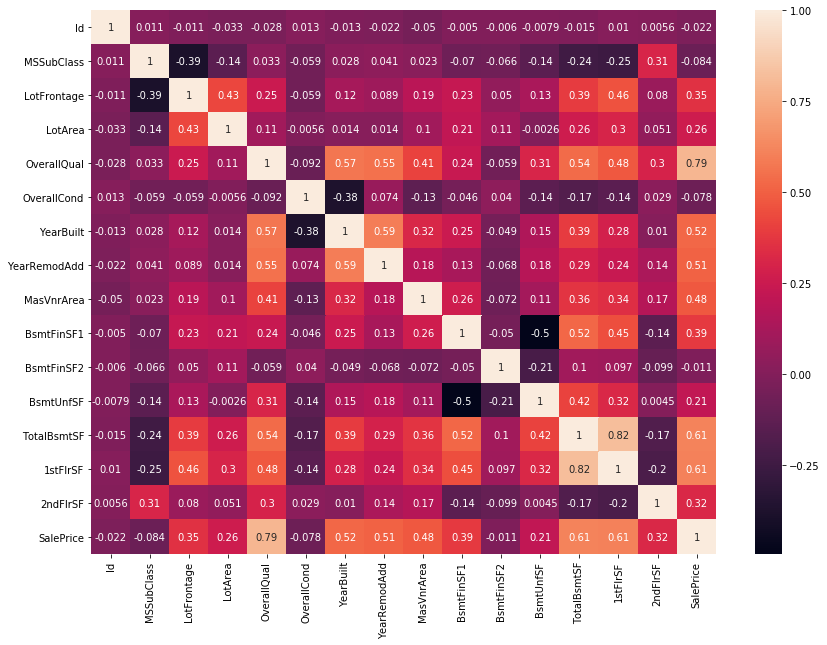

In [0]:
rcParams['figure.figsize'] = 14,10
sns.heatmap(data[decCol[:15]+['SalePrice']].corr(), annot=True )

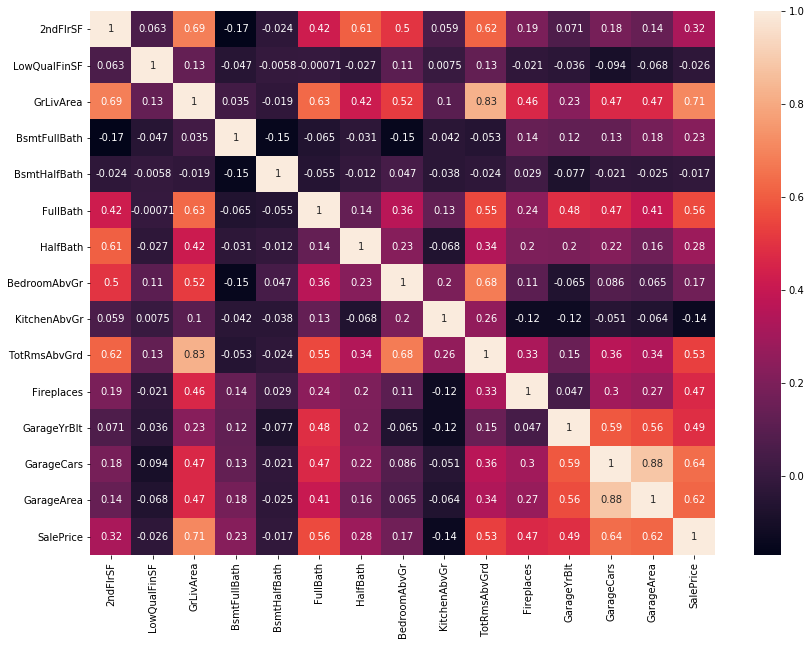

In [0]:
sns.heatmap(data[decCol[14:28]+['SalePrice']].corr(), annot=True )

**People generally like to have fewer kitchens, hence the negative correlation**

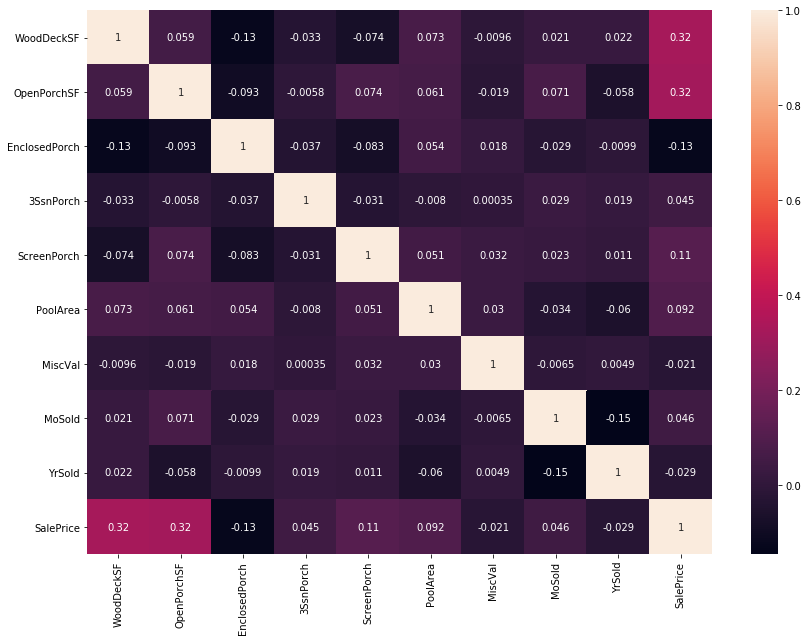

In [0]:
sns.heatmap(data[decCol[28:]+['SalePrice']].corr(), annot=True )

In [0]:
for i in objCol:
  print (i, (Counter(data[i])))

BsmtCond Counter({'TA': 1311, 'Gd': 65, 'Fa': 45, nan: 37, 'Po': 2})
MasVnrType Counter({'None': 864, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15, nan: 8})
Condition2 Counter({'Norm': 1445, 'Feedr': 6, 'Artery': 2, 'RRNn': 2, 'PosN': 2, 'PosA': 1, 'RRAn': 1, 'RRAe': 1})
BsmtExposure Counter({'No': 953, 'Av': 221, 'Gd': 134, 'Mn': 114, nan: 38})
PavedDrive Counter({'Y': 1340, 'N': 90, 'P': 30})
LandSlope Counter({'Gtl': 1382, 'Mod': 65, 'Sev': 13})
Foundation Counter({'PConc': 647, 'CBlock': 634, 'BrkTil': 146, 'Slab': 24, 'Stone': 6, 'Wood': 3})
HeatingQC Counter({'Ex': 741, 'TA': 428, 'Gd': 241, 'Fa': 49, 'Po': 1})
CentralAir Counter({'Y': 1365, 'N': 95})
GarageFinish Counter({'Unf': 605, 'RFn': 422, 'Fin': 352, nan: 81})
ExterCond Counter({'TA': 1282, 'Gd': 146, 'Fa': 28, 'Ex': 3, 'Po': 1})
BsmtQual Counter({'TA': 649, 'Gd': 618, 'Ex': 121, nan: 37, 'Fa': 35})
Fence Counter({nan: 1179, 'MnPrv': 157, 'GdPrv': 59, 'GdWo': 54, 'MnWw': 11})
GarageCond Counter({'TA': 1326, nan: 81, 'Fa': 3

1. **Roughly well distributed**: CentralAir, Neighborhood, Exterior2nd, KitchenQual, HeatingQC, GarageFinish, ExterQual, LotShape, Foundation, BsmtQual, BsmtFinType1, Exterior1st
2. **Skewed**: FireplaceQu, MasVnrType, BsmtExposure, GarageType, BldgType, Fence, HouseStyle

In [0]:
objColStr = ['HouseStyle', 'Condition1', 'Condition2' ,'CentralAir', 'Neighborhood', 'Exterior2nd', 'KitchenQual', 'GarageQual', 'HeatingQC', 'GarageFinish', 'ExterQual', 'LotShape', 'FireplaceQu', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'Exterior1st', 'MasVnrType', 'BsmtExposure', 'GarageType', 'BldgType', 'Fence']

In [0]:
print ('COLUMN NAME - % NULL VALUES')
for i in objColStr:
  print (i, np.sum(pd.isna(data[i]))*100.0/len(data))

COLUMN NAME - % NULL VALUES
HouseStyle 0.0
Condition1 0.0
Condition2 0.0
CentralAir 0.0
Neighborhood 0.0
Exterior2nd 0.0
KitchenQual 0.0
GarageQual 5.5479452054794525
HeatingQC 0.0
GarageFinish 5.5479452054794525
ExterQual 0.0
LotShape 0.0
FireplaceQu 47.26027397260274
Foundation 0.0
BsmtQual 2.5342465753424657
BsmtFinType1 2.5342465753424657
Exterior1st 0.0
MasVnrType 0.547945205479452
BsmtExposure 2.6027397260273974
GarageType 5.5479452054794525
BldgType 0.0
Fence 80.75342465753425


- APPROACH: While encoding categorical features, some categories revealed a different distributions depending upon the categorical value they took. 
- Hence those columns were sorted with respect to their mean and std deviation, and were encoded from 1 to N.
- This reflected in the correlation chart with high correlation with Saleprice.

In [0]:
sortedIndexN = pd.concat([data.groupby('Neighborhood').SalePrice.mean(), data.groupby('Neighborhood').SalePrice.std()], axis=1)
sortedIndexN.columns = list(['meanVal', 'stdVal'])
sortedIndexN = sortedIndexN.sort_values(['stdVal'])
sortedIndexN = sortedIndexN.sort_values(['meanVal'], ascending=False)
sortedIndexN.reset_index(inplace=True)
sortedIndexN

,Neighborhood,meanVal,stdVal
0,NoRidge,335295.317073,121412.658640
1,NridgHt,316270.623377,96392.544954
2,StoneBr,310499.000000,112969.676640
3,Timber,242247.447368,64845.651549
4,Veenker,238772.727273,72369.317959
5,Somerst,225379.837209,56177.555888
6,ClearCr,212565.428571,50231.538993
7,Crawfor,210624.725490,68866.395472
8,CollgCr,197965.773333,51403.666438
9,Blmngtn,194870.882353,30393.229219


In [0]:
sortedIndexH = pd.concat([data.groupby('HouseStyle').SalePrice.mean(), data.groupby('HouseStyle').SalePrice.std()], axis=1)
sortedIndexH.columns = list(['meanVal', 'stdVal'])
sortedIndexH = sortedIndexH.sort_values(['stdVal'])
sortedIndexH = sortedIndexH.sort_values(['meanVal'], ascending=False)
sortedIndexH.reset_index(inplace=True)
sortedIndexH

,HouseStyle,meanVal,stdVal
0,2.5Fin,220000.000000,118211.976671
1,2Story,210051.764045,87339.213570
2,1Story,175985.477961,77055.715011
3,SLvl,166703.384615,38305.161339
4,2.5Unf,157354.545455,63934.128032
5,1.5Fin,143116.740260,54277.941119
6,SFoyer,135074.486486,30480.898192
7,1.5Unf,110150.000000,19036.473090


In [0]:
sortedIndexL = pd.concat([data.groupby('LotShape').SalePrice.mean(), data.groupby('LotShape').SalePrice.std()], axis=1)
sortedIndexL.columns = list(['meanVal', 'stdVal'])
sortedIndexL = sortedIndexL.sort_values(['stdVal'])
sortedIndexL = sortedIndexL.sort_values(['meanVal'], ascending=False)
sortedIndexL.reset_index(inplace=True)
sortedIndexL

,LotShape,meanVal,stdVal
0,IR2,239833.365854,99669.427362
1,IR3,216036.500000,82540.334855
2,IR1,206101.665289,85858.489559
3,Reg,164754.818378,69673.427215


In [0]:
dataObj = data[objColStr]
dataObj['Neighborhood'] = dataObj['Neighborhood']. replace(dict(zip(sortedIndexN.Neighborhood, reversed(range(1,len(sortedIndexN)+1)))))
dataObj['HouseStyle'] = dataObj['HouseStyle']. replace(dict(zip(sortedIndexH.HouseStyle, reversed(range(1,len(sortedIndexH)+1)))))
dataObj['LotShape'] = dataObj['LotShape']. replace(dict(zip(sortedIndexL.LotShape, reversed(range(1,len(sortedIndexL)+1)))))
objColStr.remove('Neighborhood')
objColStr.remove('HouseStyle')
objColStr.remove('LotShape')
for i in objColStr:
  dataObj[i].fillna(0, inplace=True)
  sortedIndex = dataObj[i].value_counts().index
  if ('Qu' in i or 'QC' in i):
    dataObj[i].replace({'Po':1 ,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
  else:
    dataObj[i] = dataObj[i].map(dict(zip(sortedIndex, range(1, len(sortedIndex)+1))))
dataObj['SalePrice'] = data['SalePrice']



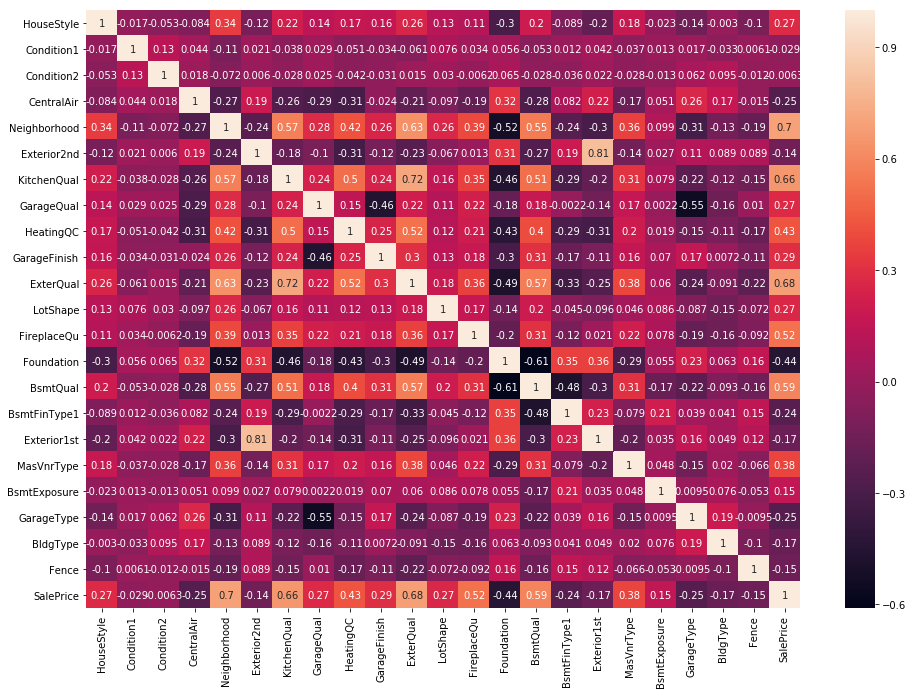

In [0]:
rcParams['figure.figsize'] = 16,11
sns.heatmap(dataObj.corr(), annot=True)

In [0]:
interestingCol = ['Neighborhood', 'HouseStyle', 'GarageFinish', 'LotShape', 'GarageQual', 'BsmtQual', 'FireplaceQu', 'MasVnrType', 'KitchenQual', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF', 'Fireplaces', 'TotRmsAbvGrd', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'FullBath', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'BedroomAbvGr', 'KitchenAbvGr']


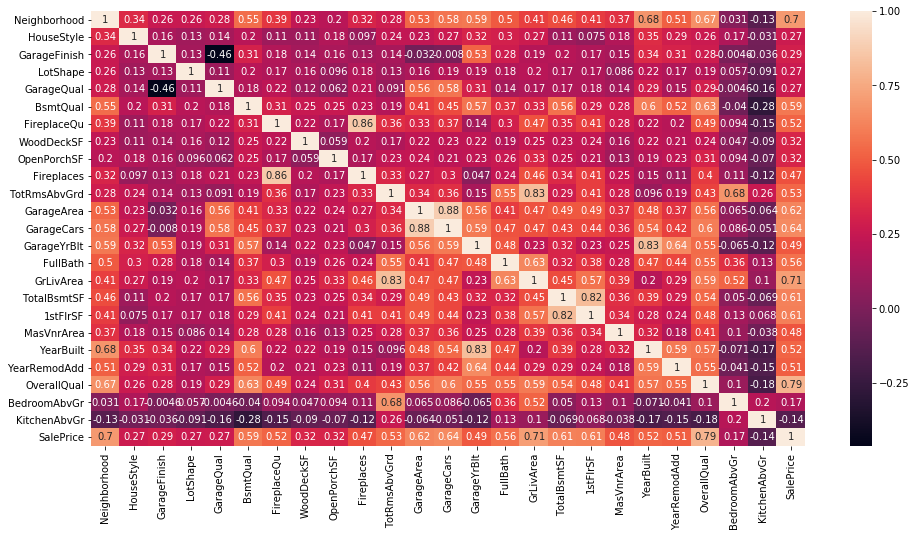

In [0]:
df = pd.concat([dataObj[interestingCol[:7]], data[interestingCol[7:]], data['SalePrice']], axis=1)
sns.heatmap(df.corr(), annot=True)


**Inference**
- Our approach of encoding the Categorical columns: Neighborhood, LotShape and HouseStyle resulted in good correlation values. 
- The OverallQual and qualities, and the fields with Area is highly correlated with the SalePrice, which doesn't surprise us.
- The fireplace is highly correlated with Saleprice, which talks about the importance of Fireplace in a location like IOWA.
- The number of Kitchens is negatively correlated with the price. It makes sense because people mostly like to have no more than 1 kitchen.
- There are trivial high correaltions between garage area and number, Total Rooms and LivArea of cars that also show up.
- Not really able to explain well GarageQual and GarageFinish are inveresely correlated because a different encoding was performed.

## Part 2 - Informative Plots

In [0]:
for i in df.columns:
  print (i,':', descDict[i], ':', data[i].dtype)

Neighborhood : Physical locations within Ames city limits : object
HouseStyle : Style of dwelling : object
GarageFinish : Interior finish of the garage : object
LotShape : General shape of property : object
GarageQual : Garage quality : object
BsmtQual : Height of the basement : object
FireplaceQu : Fireplace quality : object
MasVnrType : Masonry veneer type : object
KitchenQual : Kitchen quality : object
ExterQual : Exterior material quality : object
WoodDeckSF : Wood deck area in square feet : int64
OpenPorchSF : Open porch area in square feet : int64
Fireplaces : Number of fireplaces : int64
TotRmsAbvGrd : Total rooms above grade (does not include bathrooms) : int64
GarageArea : Size of garage in square feet : int64
GarageCars : Size of garage in car capacity : int64
GarageYrBlt : Year garage was built : float64
FullBath : Full bathrooms above grade : int64
GrLivArea : Above grade (ground) living area square feet : int64
TotalBsmtSF : Total square feet of basement area : int64
1stFl

Text(0.5, 1.0, 'Box Plots of Sale Price for each Neighborhood')

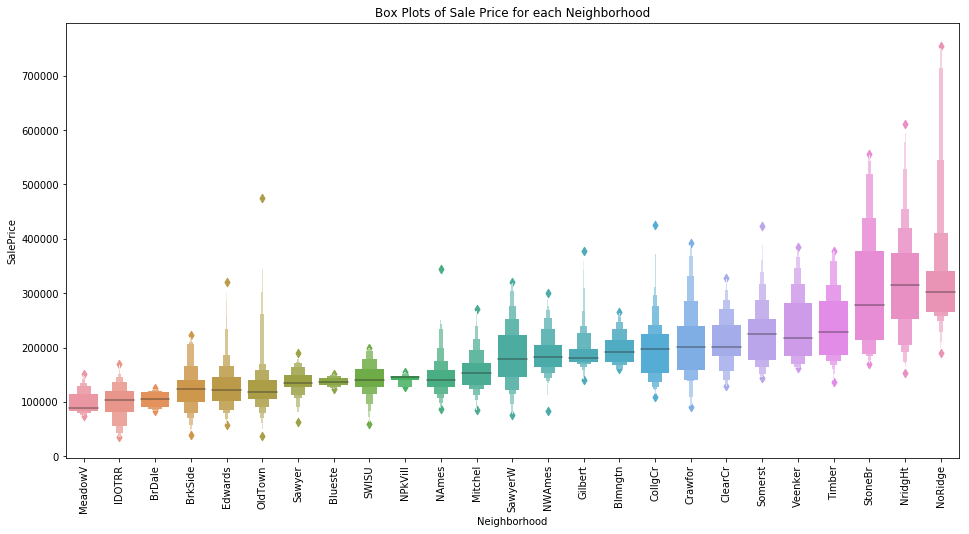

In [0]:
rcParams['figure.figsize'] = 16,8
g = sns.boxenplot(x=dataObj['Neighborhood'], y=data['SalePrice'])
g.set_xticklabels(reversed(list(sortedIndexN.Neighborhood)), rotation=90)
g.set_title("Box Plots of Sale Price for each Neighborhood")

**Inference: This clearly shows what our embeddings are based on. Higher mean value gets higher encoding. There is very high amount of information in this embedding towards SalePrice** 

Text(0.5, 1.0, 'Box Plots of number of houses for each Neighborhood')

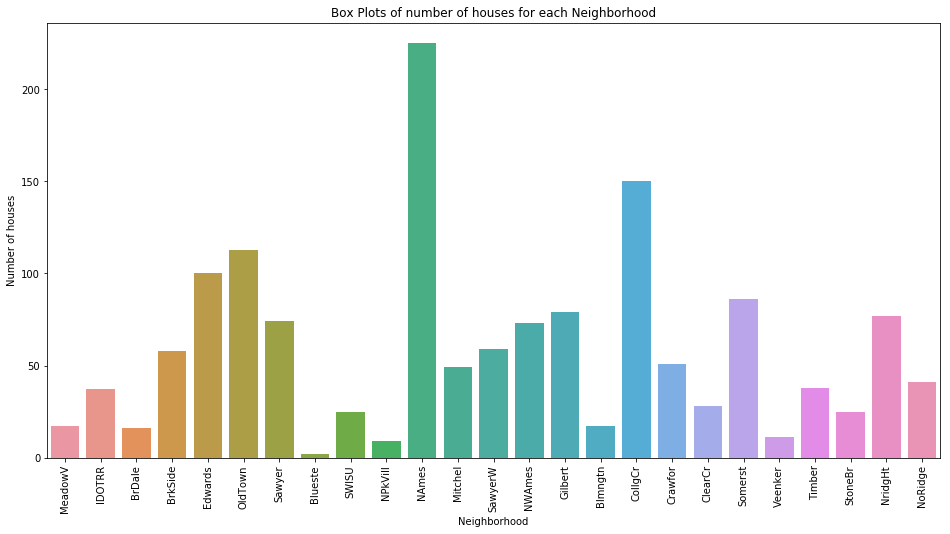

In [0]:
rcParams['figure.figsize'] = 16,8
g = sns.countplot(dataObj['Neighborhood'])
g.set_ylabel("Number of houses")
g.set_xticklabels(reversed(list(sortedIndexN.Neighborhood)), rotation=90)
g.set_title("Box Plots of number of houses for each Neighborhood")

- **Inference: This plot and the plot above together mean something different. The plot here says where most people prefer to live. From this plot we see that NAmes has a lower sale price and a lot of houses. The less expensive ones are fewer in number and so are the more expensive ones as well. Kind of Normal in behavior.**

- **The CollegeCr has a lot of houses, which talks about the student population in that region.**


Text(0.5, 1.0, 'Box plot of Cost per SF (LotArea) across Neighborhoods')

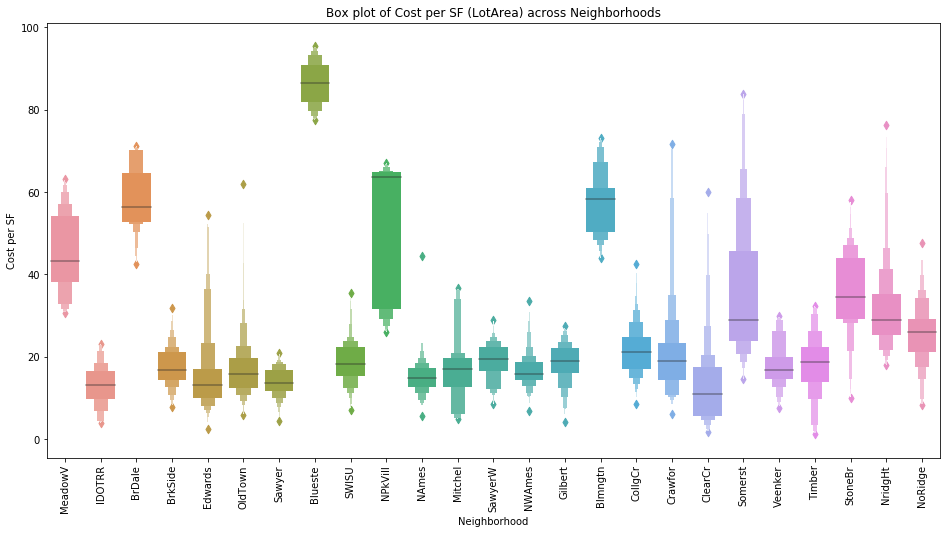

In [0]:
rcParams['figure.figsize'] = 16,8
g = sns.boxenplot(x=dataObj['Neighborhood'], y=data['SalePrice']/data['LotArea'])
g.set_ylabel("Cost per SF")
g.set_xticklabels(reversed(list(sortedIndexN.Neighborhood)), rotation=90)
g.set_title("Box plot of Cost per SF (LotArea) across Neighborhoods")

**Inference: This explains why places like Blueste, MeadowV, BrDaleBlmgtn have fewer houses to sell. They have very high cost per SF. This is a question of affordability. Note that CollegeCr is much affordable for the college students.**

Text(0.5, 1.0, 'Box Plots of Lot Area for each Neighborhood')

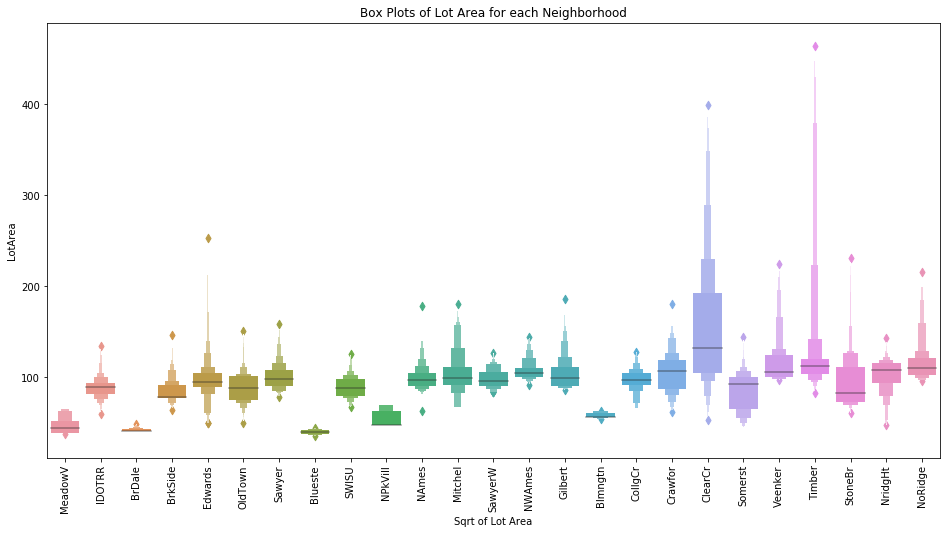

In [0]:
rcParams['figure.figsize'] = 16,8
g = sns.boxenplot(x=dataObj['Neighborhood'], y=np.sqrt(data['LotArea']))
g.set_xlabel("Sqrt of Lot Area")
g.set_xticklabels(reversed(list(sortedIndexN.Neighborhood)), rotation=90)
g.set_title("Box Plots of Lot Area for each Neighborhood")

**Inference: This was plotted to do a check by multiplexing the information from the two graphs above. To make sure if they make sense. The expensive plots are smaller in sizes.**

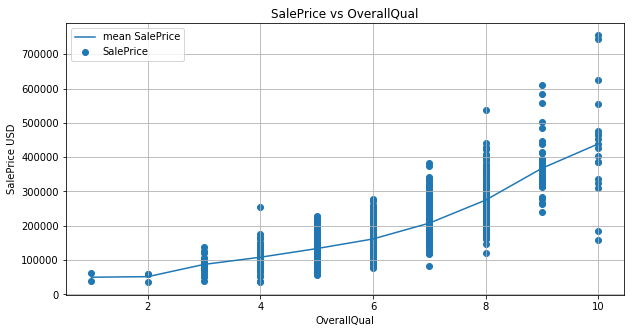

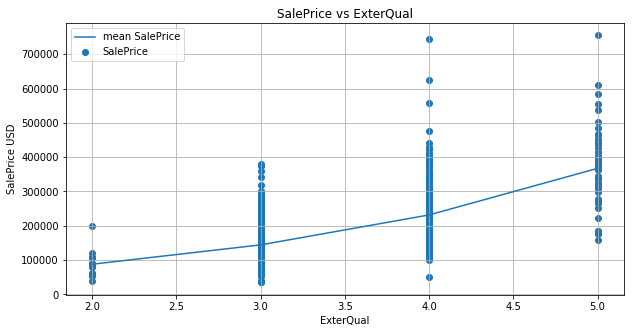

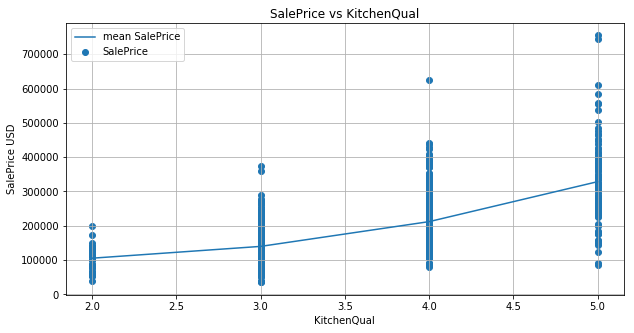

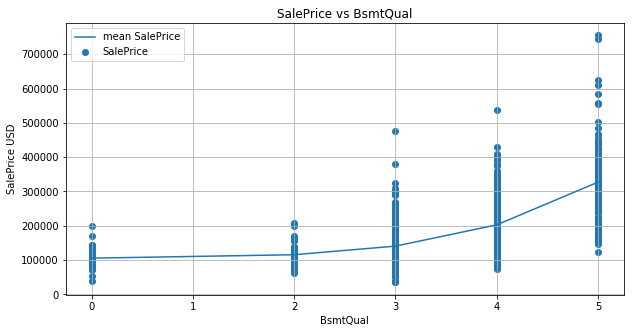

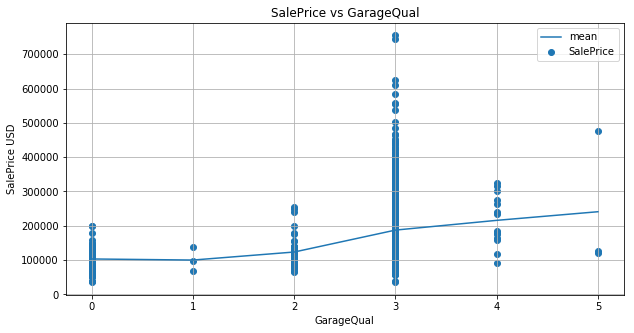

In [0]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter((data['OverallQual']), data['SalePrice'])
plt.plot(data.groupby('OverallQual').groups.keys(), data.groupby('OverallQual').SalePrice.mean(), label='mean SalePrice')
plt.legend()
plt.ylabel('SalePrice USD')
plt.xlabel('OverallQual')
plt.title("SalePrice vs OverallQual")
plt.show()

plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(dataObj['ExterQual'], data['SalePrice'])
p = data.groupby('ExterQual').SalePrice.mean()
p.index = p.index.map({'Po':1 ,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},na_action=0)
p.sort_index(inplace=True)
plt.plot(p.index, p.values, label='mean SalePrice')
plt.legend()
plt.ylabel('SalePrice USD')
plt.xlabel('ExterQual')
plt.title("SalePrice vs ExterQual")
plt.show()

plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(dataObj['KitchenQual'], data['SalePrice'])
p = data.groupby('KitchenQual').SalePrice.mean()
p.index = p.index.map({'Po':1 ,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},na_action=0)
p.sort_index(inplace=True)
plt.plot(p.index, p.values, label='mean SalePrice')
plt.legend()
plt.ylabel('SalePrice USD')
plt.xlabel('KitchenQual')
plt.title("SalePrice vs KitchenQual")
plt.show()

plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(dataObj['BsmtQual'], data['SalePrice'])
p = data.fillna(0).groupby('BsmtQual').SalePrice.mean()
p.index = p.index.map({0:0 ,'Po':1 ,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
p.sort_index(inplace=True)
plt.plot(p.index, p.values, label='mean SalePrice')
plt.legend()
plt.ylabel('SalePrice USD')
plt.xlabel('BsmtQual')
plt.title("SalePrice vs BsmtQual")
plt.show()

plt.figure(figsize=(10,5))
plt.grid(True)
plt.scatter(dataObj['GarageQual'], data['SalePrice'])
p = data.fillna(0).groupby('GarageQual').SalePrice.mean()
p.index = p.index.map({0:0, 'Po':1 ,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
p.sort_index(inplace=True)
plt.plot(p.index, p.values, label='mean')
plt.legend()
plt.ylabel('SalePrice USD')
plt.xlabel('GarageQual')
plt.title("SalePrice vs GarageQual")
plt.show()

1. **Inference: We are able to notice that the least cost as well as the highest cost (upper bound) increases as the Quality increases. The increase is somewhat non-linear. NOTE that we shouldn't factor the outliers (Outliers can be seen at Overall Quality = 4,9,10).**

2. **The garage Qual has very little information to provide as the SalePrice value doesnt increase sharply as the GarageQual increases. A simple bias term can be used to rectify this**

3. **ExterQual and BsmtQual are les affected by outliers at rating=5 but KitchenQual seems to have a lot of outliers at 5**

4. **Lets take a look at the outliers below**

In [0]:
data.sort_values(['SalePrice'])[data.OverallQual==10][list(df.columns) + ['Neighborhood']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Neighborhood,HouseStyle,GarageFinish,LotShape,GarageQual,BsmtQual,FireplaceQu,MasVnrType,KitchenQual,ExterQual,WoodDeckSF,OpenPorchSF,Fireplaces,TotRmsAbvGrd,GarageArea,GarageCars,GarageYrBlt,FullBath,GrLivArea,TotalBsmtSF,1stFlrSF,MasVnrArea,YearBuilt,YearRemodAdd,OverallQual,BedroomAbvGr,KitchenAbvGr,SalePrice,Neighborhood
1298,Edwards,2Story,Fin,IR3,TA,Ex,Gd,Stone,Ex,Ex,214,292,3,12,1418,2,2008.0,2,5642,6110,4692,796.0,2008,2008,10,3,1,160000,Edwards
523,Edwards,2Story,Fin,IR1,TA,Ex,Gd,Stone,Ex,Ex,208,406,1,11,884,3,2007.0,3,4676,3138,3138,762.0,2007,2008,10,3,1,184750,Edwards
1442,Somerst,2Story,Fin,Reg,TA,Ex,Ex,Stone,Ex,Ex,168,52,1,10,812,3,2008.0,2,2007,1017,1026,160.0,2008,2008,10,3,1,310000,Somerst
583,OldTown,2.5Unf,Unf,Reg,Gd,TA,Gd,None,Gd,Ex,105,502,1,9,880,2,1988.0,3,2775,1237,1521,0.0,1893,2000,10,3,1,325000,OldTown
994,NridgHt,1Story,Fin,Reg,TA,Ex,Gd,Stone,Ex,Ex,216,48,1,7,786,3,2008.0,2,1718,1700,1718,230.0,2006,2007,10,3,1,337500,NridgHt
825,NridgHt,1Story,Fin,Reg,TA,Ex,Gd,BrkFace,Ex,Ex,188,45,1,7,1220,3,2007.0,2,2084,2078,2084,816.0,2007,2008,10,2,1,385000,NridgHt
224,NridgHt,1Story,Fin,Reg,TA,Ex,Ex,BrkFace,Ex,Ex,248,105,1,8,968,3,2003.0,2,2392,2392,2392,922.0,2003,2003,10,3,1,386250,NridgHt
515,NridgHt,1Story,Fin,Reg,TA,Ex,Gd,BrkFace,Ex,Ex,156,54,1,9,900,3,2009.0,2,2020,2006,2020,305.0,2009,2009,10,3,1,402861,NridgHt
389,NridgHt,2Story,Fin,Reg,TA,Ex,Ex,Stone,Ex,Ex,196,134,1,9,846,3,2008.0,2,2332,1682,1742,272.0,2007,2008,10,3,1,426000,NridgHt
58,StoneBr,2Story,Fin,IR2,TA,Ex,Gd,BrkFace,Gd,Ex,192,0,1,10,641,3,2006.0,3,2945,1410,1426,1031.0,2006,2006,10,3,1,438780,StoneBr


The Neighborhood like Edwards has a less Cost Per SF which was the reason why the Cost was less although the OverallQual was quite high. Wouldn't be surprised to find a couple of good quality houses in the least preferred neighborhoods.

In [43]:
data.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



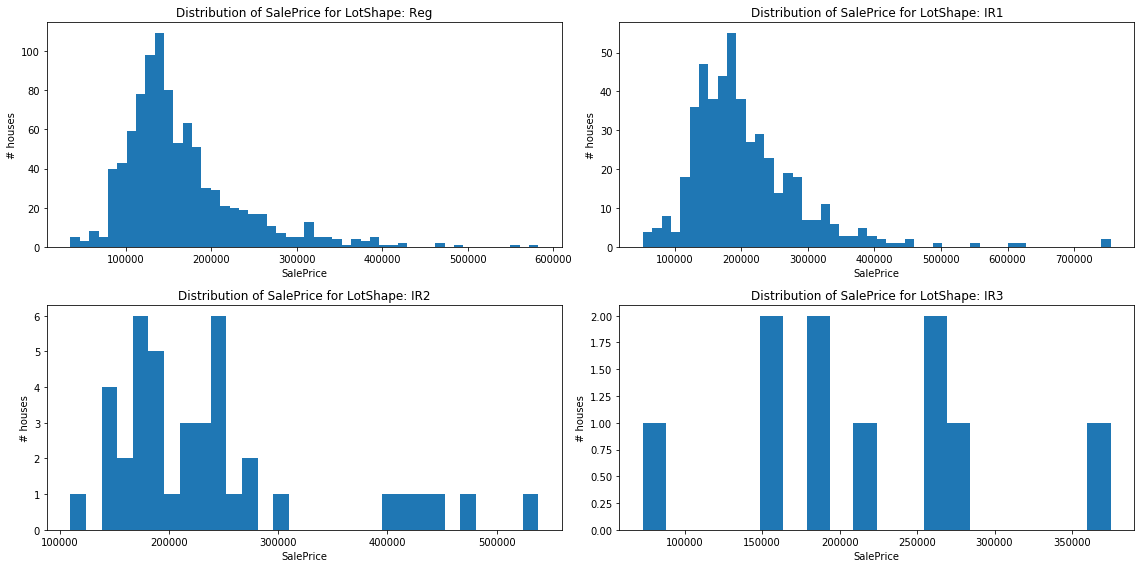

In [45]:
fig, ax = plt.subplots(nrows = 2,ncols=2)
fig.set_tight_layout('pad')
ax[0, 0].hist(data[data.LotShape == 'Reg']['SalePrice'], bins=50)
ax[0, 0].set_xlabel("SalePrice")
ax[0, 0].set_ylabel("# houses")
ax[0, 0].set_title("Distribution of SalePrice for LotShape: Reg")
ax[0, 1].hist(data[data.LotShape == 'IR1']['SalePrice'], bins=50)
ax[0, 1].set_xlabel("SalePrice")
ax[0, 1].set_ylabel("# houses")
ax[0, 1].set_title("Distribution of SalePrice for LotShape: IR1")
ax[1, 0].hist(data[data.LotShape == 'IR2']['SalePrice'], bins=30)
ax[1, 0].set_xlabel("SalePrice")
ax[1, 0].set_ylabel("# houses")
ax[1, 0].set_title("Distribution of SalePrice for LotShape: IR2")
ax[1, 1].hist(data[data.LotShape == 'IR3']['SalePrice'], bins=20)
ax[1, 1].set_xlabel("SalePrice")
ax[1, 1].set_ylabel("# houses")
ax[1, 1].set_title("Distribution of SalePrice for LotShape: IR3")
plt.show()

**Inference: There is a change in distribution of SalePrice depending upon the LotShape.**

In [46]:
data['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



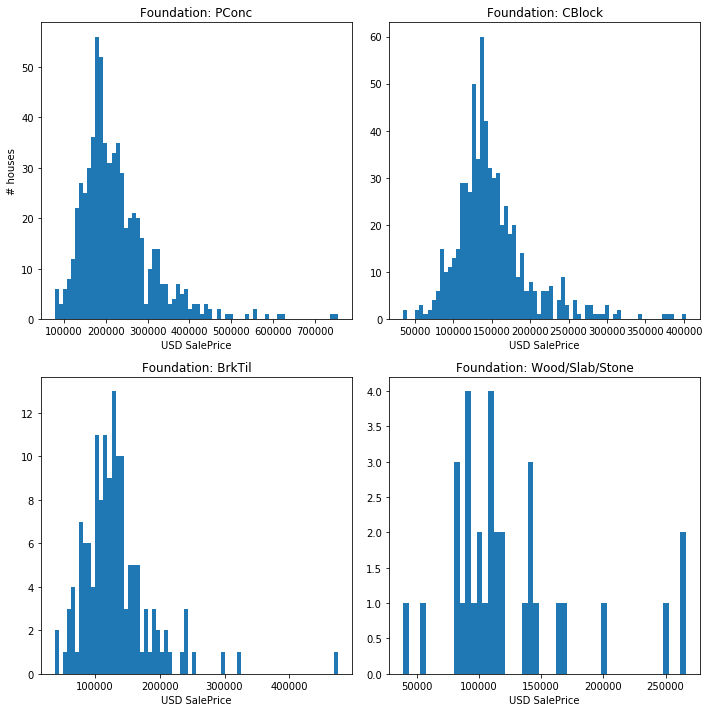

In [48]:
fig, ax = plt.subplots(nrows = 2,ncols=2, figsize=(10,10))
fig.set_tight_layout('pad')
ax[0, 0].hist(data[data.Foundation == 'PConc']['SalePrice'], bins=70)
ax[0, 0].set_xlabel("USD SalePrice")
ax[0, 0].set_ylabel("# houses")
ax[0, 0].set_title("Foundation: PConc")
ax[0, 1].hist(data[data.Foundation == 'CBlock']['SalePrice'], bins=70)
ax[0, 1].set_xlabel("USD SalePrice")
ax[0, 0].set_ylabel("# houses")
ax[0, 1].set_title("Foundation: CBlock")
ax[1, 0].hist(data[data.Foundation == 'BrkTil']['SalePrice'], bins=70)
ax[1, 0].set_xlabel("USD SalePrice")
ax[0, 0].set_ylabel("# houses")
ax[1, 0].set_title("Foundation: BrkTil")
ax[1, 1].hist(data[data.Foundation.isin(['Wood','Slab','Stone'])]['SalePrice'], bins=50)
ax[1, 1].set_xlabel("USD SalePrice")
ax[0, 0].set_ylabel("# houses")
ax[1, 1].set_title("Foundation: Wood/Slab/Stone")
plt.show()

**Inference: Similar to the above plot, we find the distribution of the SalePrice changes with different categories that Foundation can take.**

**This pattern was also checked for Housestyle and BldgType below**

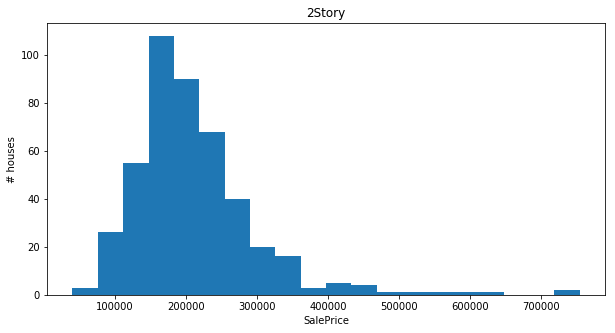

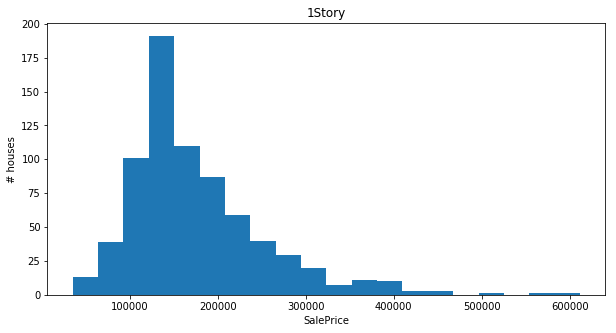

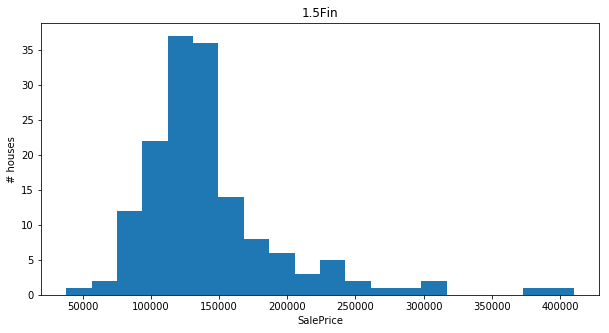

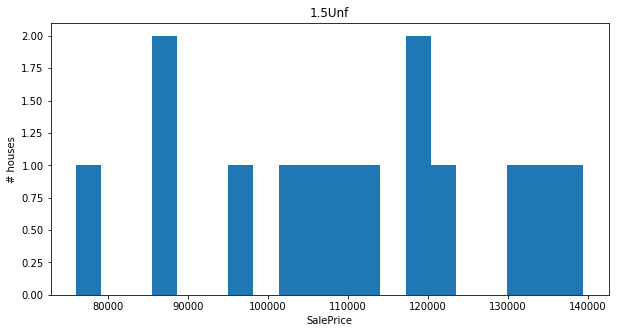

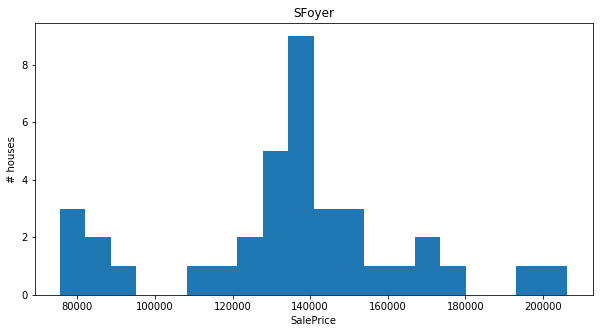

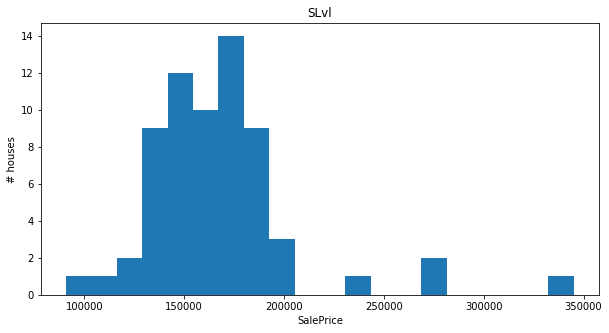

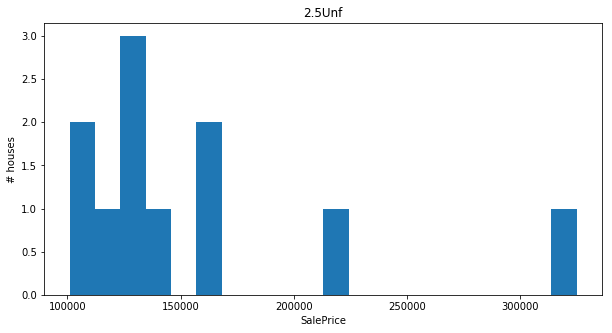

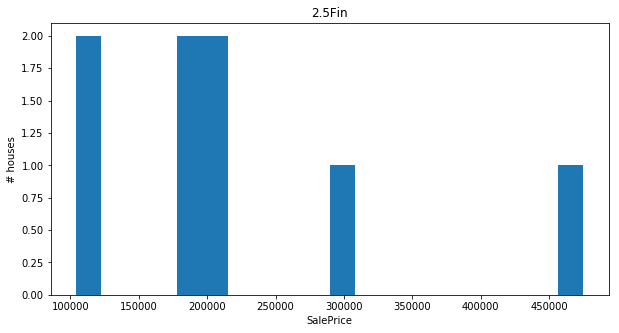

In [49]:
for i in data['HouseStyle'].unique():
  plt.figure(figsize=(10,5))
  plt.title(i)
  plt.hist(data[data.HouseStyle==i]['SalePrice'], bins=20)
  plt.ylabel("# houses")
  plt.xlabel("SalePrice")
  plt.show()

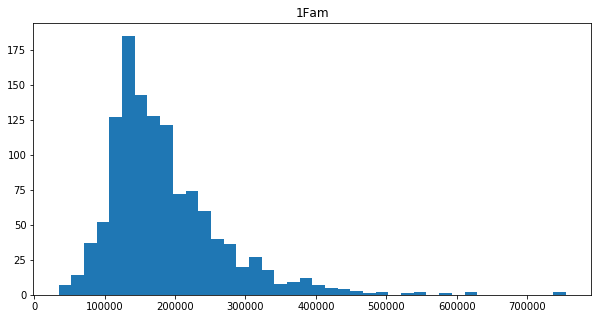

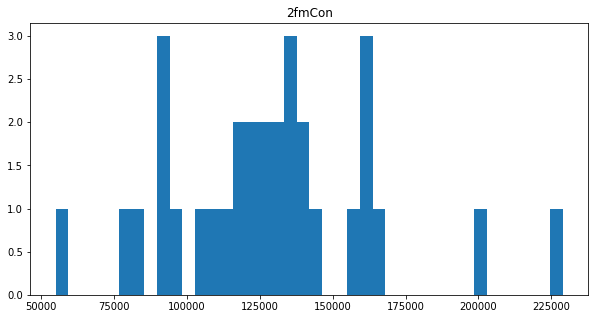

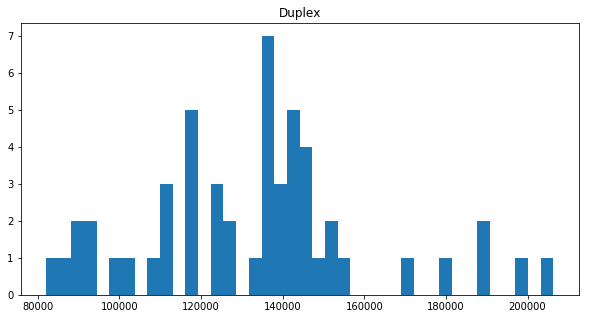

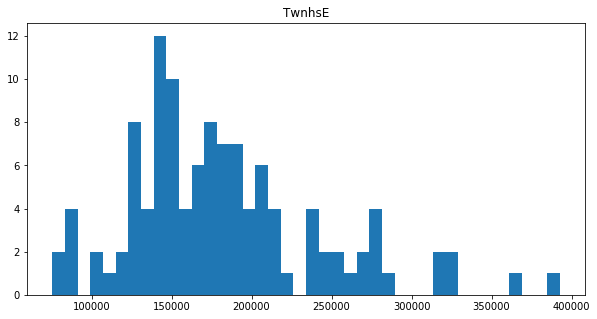

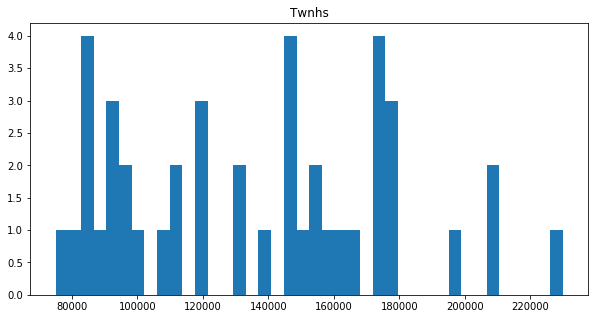

In [50]:
for i in data['BldgType'].unique():
  plt.figure(figsize=(10,5))
  plt.title(i)
  plt.hist(data[data.BldgType==i]['SalePrice'], bins=40)
  plt.show()

## Part 3 - Handcrafted Scoring Function 

In [51]:
interestingCol + ['SalePrice']

['Neighborhood',
 'HouseStyle',
 'GarageFinish',
 'LotShape',
 'GarageQual',
 'BsmtQual',
 'FireplaceQu',
 'MasVnrType',
 'KitchenQual',
 'ExterQual',
 'WoodDeckSF',
 'OpenPorchSF',
 'Fireplaces',
 'TotRmsAbvGrd',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'FullBath',
 'GrLivArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'MasVnrArea',
 'YearBuilt',
 'YearRemodAdd',
 'OverallQual',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'SalePrice']


**Intitution: Scoring val and**
1.   Neighborhood value directly proportional
2.   YearBuilt directly proportional
3.   YearRemodAdd directly Proportional
4.   GrLiveArea directly Proportional
5.   BedroomAbvGr directly proportional (more like parabolic/ modulo. Lets reiterate)
6.   KitchenAbvGr indirectly proportional
7.   TotalBsmtSF indirectly proportional
8.   SalePrice indirectly proportional



In [0]:
scoringCols = ['Neighborhood', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalBsmtSF', 'SalePrice']

In [0]:
scoreDf = pd.concat([dataObj[['Neighborhood']], data[scoringCols[1:]]], axis=1)

In [54]:
scoreDf.head()

,Neighborhood,YearBuilt,YearRemodAdd,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF,SalePrice
0,17,2003,2003,1710,3,1,856,208500
1,21,1976,1976,1262,3,1,1262,181500
2,17,2001,2002,1786,3,1,920,223500
3,18,1915,1970,1717,3,1,756,140000
4,25,2000,2000,2198,4,1,1145,250000


My understanding behind building the scoring function: 

1. If the sale price is less for a given setup (bedroom, kitchen, neighborhood etc) then it gets a good score)
2. Similarly lower the number of kitchens the better it is
3. All the other values would be preferred to be high: #bedrooms, YearBuilt, YearRemodAdd, Area, Neighborhood

In [0]:
scoreDf.sort_values(by=['KitchenAbvGr'], ascending=False, inplace=True)
scoreDf.sort_values(by=['SalePrice', 'Neighborhood', 'BedroomAbvGr', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd'], ascending=True, inplace=True)

1. Skiena had cited in one of the posts in piazza that more expensive, large homes are the most desired. 
2. Hence I take the above features and I sort them in the order of precedence that I feel they are important. 
3. I sort the kitchen in the reverse order, because I believe that people prefer to have only one kitchen. Hence more kitchen should probably mean less desirable opposed to the ones have more kitchens in a similar setup. 
4. **NEIGHBORHOOD definitely matters. It is more desired to have a large apartment at Manhattan against a large house at Stony Brook. But I am not very sure if my model will be able to pick it up. *LETS SEE*.**



In [0]:
'''brkt = set(scoreDf.BedroomAbvGr.astype('str') + scoreDf.KitchenAbvGr.astype('str'))
print ('br\tkt\t #')
for i in sorted(brkt):
  br, kt = int(i[0]), int(i[1])
  print (br,'\t', kt,'\t', scoreDf[(scoreDf.BedroomAbvGr==br) & (scoreDf.KitchenAbvGr==kt)].shape[0])
scoreDf = scoreDf[(scoreDf.BedroomAbvGr>0)&(scoreDf.KitchenAbvGr>0)]
scoreDf['score'] = 0.0
scoreDf.loc[scoreDf.BedroomAbvGr==1,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr==1])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr==1])
scoreDf.loc[scoreDf.BedroomAbvGr==2,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr==2])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr==2])
scoreDf.loc[scoreDf.BedroomAbvGr==3,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr==3])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr==3])
scoreDf.loc[scoreDf.BedroomAbvGr>=4,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr>=4])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr>=4])
scoreDf.reset_index(drop=True, inplace=True)
scoreDf.head()'''

"brkt = set(scoreDf.BedroomAbvGr.astype('str') + scoreDf.KitchenAbvGr.astype('str'))\nprint ('br\tkt\t #')\nfor i in sorted(brkt):\n  br, kt = int(i[0]), int(i[1])\n  print (br,'\t', kt,'\t', scoreDf[(scoreDf.BedroomAbvGr==br) & (scoreDf.KitchenAbvGr==kt)].shape[0])\nscoreDf = scoreDf[(scoreDf.BedroomAbvGr>0)&(scoreDf.KitchenAbvGr>0)]\nscoreDf['score'] = 0.0\nscoreDf.loc[scoreDf.BedroomAbvGr==1,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr==1])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr==1])\nscoreDf.loc[scoreDf.BedroomAbvGr==2,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr==2])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr==2])\nscoreDf.loc[scoreDf.BedroomAbvGr==3,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr==3])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr==3])\nscoreDf.loc[scoreDf.BedroomAbvGr>=4,'score'] = (np.array(range(1,len(scoreDf[scoreDf.BedroomAbvGr>=4])+1))*100.0)/len(scoreDf[scoreDf.BedroomAbvGr>=4])\nscoreDf.reset_index(drop=T

In [56]:
scoreDf['score'] = (np.array(range(1,len(scoreDf)+1))*100.0)/len(scoreDf)
scoreDf.reset_index(drop=True, inplace=True)
scoreDf.head()

,Neighborhood,YearBuilt,YearRemodAdd,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF,SalePrice,score
0,2,1920,1950,720,2,1,720,34900,0.068493
1,2,1949,1950,480,1,1,480,35311,0.136986
2,6,1910,1950,968,2,1,600,37900,0.205479
3,4,1946,1950,334,1,1,0,39300,0.273973
4,2,1920,1950,1317,3,1,649,40000,0.342466


In [57]:
scoreDf.tail()

,Neighborhood,YearBuilt,YearRemodAdd,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF,SalePrice,score
1455,24,2008,2009,2822,4,1,1734,582933,99.726027
1456,24,2009,2010,2364,2,1,2330,611657,99.794521
1457,25,1995,1996,3627,4,1,1930,625000,99.863014
1458,25,1996,1996,4476,4,1,2396,745000,99.931507
1459,25,1994,1995,4316,4,1,2444,755000,100.000000


**SALE PRICE IS NOT USED TO CREATE THE SCORE FUNCTION**

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(scoreDf.iloc[:,:-2], scoreDf.iloc[:,-1], test_size=0.2, random_state=42)

In [59]:
lr = LinearRegression( )
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print (scoreDf.columns)
print (lr.coef_, lr.intercept_)

Index(['Neighborhood', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotalBsmtSF', 'SalePrice', 'score'],
      dtype='object')
[ 1.53326188e+00  1.44139544e-01  2.16678766e-01  2.30897200e-02
 -2.30230341e-01 -1.43553626e+01  7.08627666e-03] -711.0247282139175


**As we can see, Neighborhood embedding that we designed has the most weight followed by YearRemodAdd, YearBuilt and GrLivArea and BsmtSf**
**The Bedroom gets a negative weight which is a bit surprising. The Kitchen gets the least weight as expected.**

In [61]:
lr.score(X_test, Y_test)

0.8102890090490543

In [62]:
rr = Ridge(alpha=1000)
rr.fit(X_train, Y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
print (scoreDf.columns)
print (rr.coef_, rr.intercept_)

Index(['Neighborhood', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotalBsmtSF', 'SalePrice', 'score'],
      dtype='object')
[ 1.5062688   0.16285192  0.23215795  0.02205015 -0.21766488 -0.74294146
  0.00745353] -791.3780841381945


**As we can see, Neighborhood embedding that we designed has the most weight followed by YearRemodAdd, YearBuilt and GrLivArea and BsmtSf**
**The Bedroom gets a negative weight which is a bit surprising. The Kitchen gets the least weight as expected.**

In [64]:
rr.score(X_test, Y_test)

0.805072690340575

In [0]:
Y_pred = rr.predict(X_test)
Y_pred[Y_pred>100.0] = 100.0
Y_pred[Y_pred<0.0] = 0.0

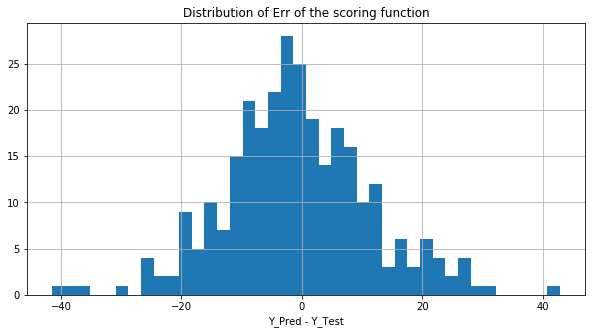

In [71]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.hist(Y_pred - Y_test, bins=40)
plt.title("Distribution of Err of the scoring function")
plt.xlabel("Y_Pred - Y_Test")
plt.show()

**The scoring function seems to have fairly performed well with the most error less that a magnitude of 10.**

In [0]:
pred  = pd.concat([X_test.reset_index(drop=True), Y_test.reset_index(drop=True), pd.DataFrame(Y_pred)], axis=1)

**PERFORMANCE OF THE DESIRABILITY SCORING FUNCTION**



In [73]:
pred.columns = pred.columns.tolist()[:-1] + ['Pred']  
pred = pred.sort_values(['score', 'Pred'], ascending=False)
pred.head(10)

,Neighborhood,YearBuilt,YearRemodAdd,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF,score,Pred
155,24,2008,2009,3140,4,1,1926,99.383562,100.000000
281,6,1892,1993,3608,4,1,1107,99.315068,74.660554
259,24,2006,2006,2076,2,1,2076,99.178082,97.233538
227,25,1994,2005,2448,4,1,1629,98.150685,100.000000
250,24,2006,2006,1973,3,1,1935,98.013699,93.693760
115,23,2010,2010,1856,1,1,1856,97.876712,91.034164
279,18,2008,2008,1652,2,1,1600,97.808219,76.088801
255,18,1935,1997,3447,4,1,728,97.397260,94.292082
123,23,2008,2008,2046,3,1,2046,96.917808,95.414514
286,24,2008,2008,1702,1,1,1702,96.643836,87.206847


**The houses with high scores seems to have gotten a high score mostly.**

In [74]:
pred.tail(10)

,Neighborhood,YearBuilt,YearRemodAdd,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalBsmtSF,score,Pred
198,5,1946,2006,930,2,1,0,3.904110,18.100314
40,1,1973,1973,1092,3,1,546,3.561644,16.235115
47,3,1973,1973,987,2,1,483,3.424658,16.680480
78,5,1955,1955,1152,2,2,0,3.082192,11.878117
137,5,1952,1952,944,2,1,0,3.013699,6.849598
160,4,1930,1960,935,2,1,742,2.260274,8.949920
197,5,1931,2006,774,3,1,544,2.123288,16.054768
60,5,1924,1950,1096,2,1,572,2.054795,9.440471
248,6,1925,2004,764,2,1,680,1.643836,17.130453
103,7,1965,1965,864,3,1,864,1.095890,19.455438


**The scoring function seems to be a bit off on the lower end of spectrum**

## Part 4 - Pairwise Distance Function

1. Distance metric: Given the params, it calculates the L1/L2/Cosine/Jaccard distance between the pairs of datapoints. 
2. I am extracting two SalePrice per square Feet 'features' to distinguish between a place in Manhattan and say, a place like Stony Brook. The difference between SalePrice per LotArea and SalePrice per GrLivArea will point that out.
3. I use the nearest house given by the KNN function that I train on. The KNN uses different distance measures as stated above.

In [0]:
distCols = ['Neighborhood', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']
distDf = pd.concat([dataObj[['Neighborhood']], data[distCols[1:]]], axis=1)
distDf['SalePerSF1'] = distDf['SalePrice']/distDf['LotArea']
distDf['SalePerSF2'] = distDf['SalePrice']/distDf['GrLivArea']


A train test split is created since if the train data is used for all the three distances, it results in the same KNN. (It will definitely have a match with itself.)

In [0]:
testSet = list(np.random.choice(distDf.index.tolist(), size=(int)(0.2*len(distDf)), replace=False ))
trainSet = list(set(distDf.index.tolist()) - set(testSet))
X_train, X_test = distDf.loc[trainSet], distDf.loc[testSet]

In [82]:
ind = [0,0,0]
dist = [0,0,0]
distances = ['l1', 'l2', 'cosine']
for i in range(len(distances)):
  neigh = NearestNeighbors(n_neighbors=5, n_jobs=-1, metric=distances[i])
  neigh.fit(X_train.iloc[:,1:])
  #neigh.fit(distDf.iloc[:,1:])
  dist[i], ind[i] = neigh.kneighbors(X_test.iloc[:, 1:])
  print (dist[i].shape, ind[i].shape)

(292, 5) (292, 5)
(292, 5) (292, 5)
(292, 5) (292, 5)


In [83]:
print ('l1 and l2 agree on closest in %d out of %d rows'%(np.sum(ind[0][:,0] == ind[1][:,0]), X_test.shape[0]))
print ('l1 and cos agree on closest in %d out of %d rows'%(np.sum(ind[0][:,0] == ind[2][:,0]), X_test.shape[0]))
print ('cos and l2 agree on closest in %d out of %d rows'%(np.sum(ind[2][:,0] == ind[1][:,0]), X_test.shape[0]))

l1 and l2 agree on closest in 245 out of 292 rows
l1 and cos agree on closest in 38 out of 292 rows
cos and l2 agree on closest in 34 out of 292 rows


In [88]:
X_test.iloc[0:1]

,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,SalePrice,SalePerSF1,SalePerSF2
1187,25,1994,12461,1624,2,1,262000,21.0256,161.330049


A sample from the test data.

In [86]:
X_train.iloc[ind[0][0]]

,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,SalePrice,SalePerSF1,SalePerSF2
612,17,2001,11885,1872,3,1,261500,22.002524,139.690171
1043,13,1990,11839,2329,4,1,262280,22.153898,112.614856
141,17,2005,11645,1734,3,1,260000,22.327179,149.942330
316,14,1980,13005,2353,4,1,260000,19.992311,110.497238
748,25,1996,10593,1720,3,1,260400,24.582271,151.395349


Output of the KNN for the data above using l1 dist

In [85]:
X_train.iloc[ind[1][0]]

,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,SalePrice,SalePerSF1,SalePerSF2
612,17,2001,11885,1872,3,1,261500,22.002524,139.690171
1043,13,1990,11839,2329,4,1,262280,22.153898,112.614856
141,17,2005,11645,1734,3,1,260000,22.327179,149.942330
316,14,1980,13005,2353,4,1,260000,19.992311,110.497238
748,25,1996,10593,1720,3,1,260400,24.582271,151.395349


Output of KNN for the data above using l2 dist

In [87]:
X_train.iloc[ind[2][0]]

,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,SalePrice,SalePerSF1,SalePerSF2
1256,25,1994,14303,1987,2,1,301500,21.079494,151.736286
426,13,1989,12800,1644,2,1,275000,21.484375,167.274939
824,20,2006,11216,1489,3,1,232600,20.738231,156.212223
67,17,2003,10665,1479,3,1,226000,21.190811,152.805950
640,24,2003,12677,1518,1,1,274000,21.613947,180.500659


Output for the data above using cosine distance (similarity).

**EVALUATION OF DISTANCE**
- Distribution of difference between the actual value in the data and the property suggested to be the closest to it for a set of columns. 

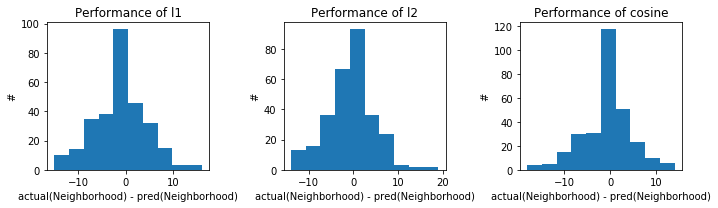

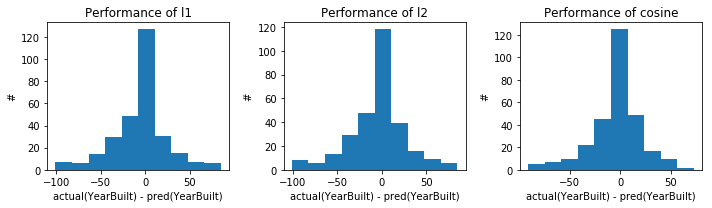

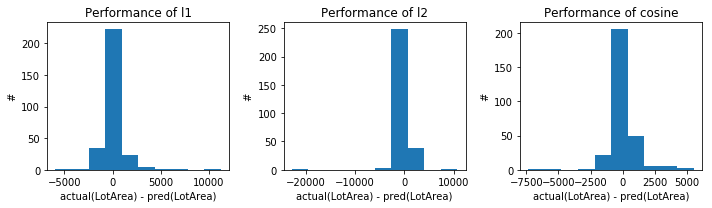

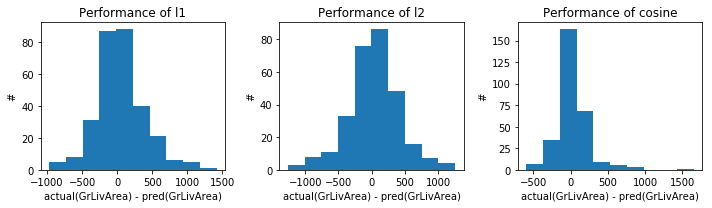

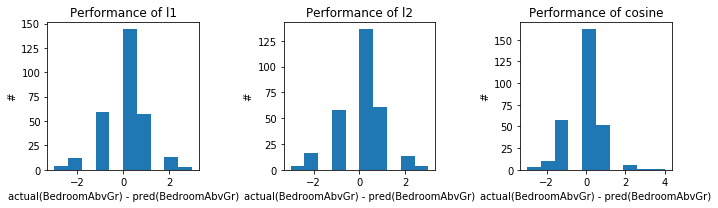

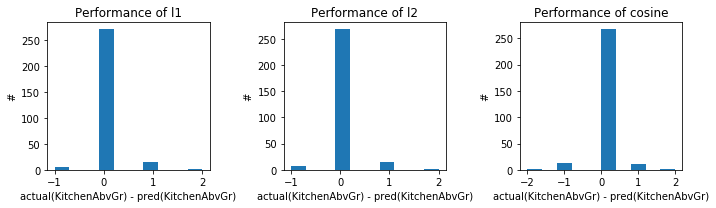

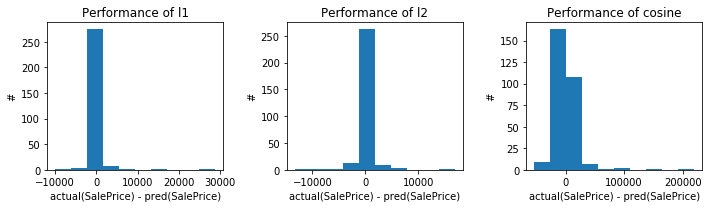

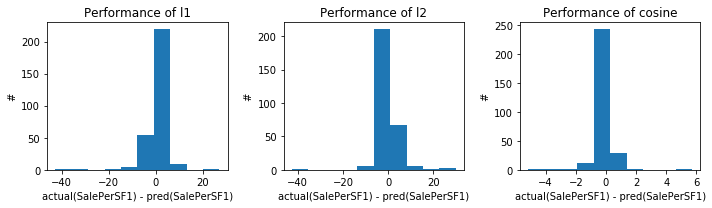

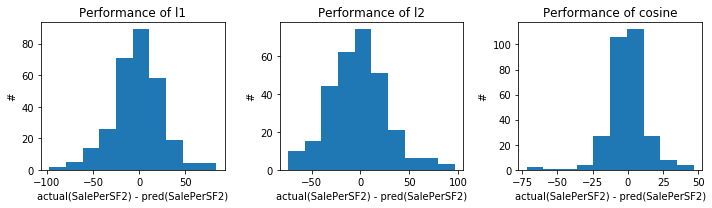

In [89]:
for j in range(X_test.shape[1]):
  err0, err1, err2 = [], [], []
  fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(10,3))
  for i in range(len(X_test)):
    err0.append(X_test.iloc[i,j] - X_train.iloc[ind[0][i][0]][j])
    err1.append(X_test.iloc[i,j] - X_train.iloc[ind[1][i][0]][j])
    err2.append(X_test.iloc[i,j] - X_train.iloc[ind[2][i][0]][j])
  err = [err0, err1, err2]
  for idx,a in enumerate(ax):
    a.hist(err[idx])
    a.set_xlabel('actual(%s) - pred(%s)'%(X_test.columns[j],X_test.columns[j]))
    a.set_ylabel('#')
    a.set_title('Performance of %s'%(distances[int(idx)]))
    plt.tight_layout()

  

**Inference: Going by the performance of cosine distance in Neighborhood, GrLivArea, BedroomAbvGr, SalePrice, SalePeSF1 and SalePerSF2, I would definitely go with cosine distance!**

## Part 5 - Clustering

- **There is a direct linear connection between cosine distance and Eucledian distance for normalized vectors. Credits: [refer here](https://stats.stackexchange.com/questions/299013/cosine-distance-as-similarity-measure-in-kmeans).** 

- **I use K Means and agglomerative clustering techniques.**

In [0]:
X_Norm = preprocessing.normalize(distDf.iloc[:,1:])
km = []
agg = []
for i in range(5,21,5):
  km.append(cluster.KMeans(n_clusters=i, n_jobs=-1).fit(X_Norm))
  agg.append(cluster.AgglomerativeClustering(n_clusters=i).fit(X_Norm))

**PERFORMANCE EVALUATION OF CLUSTERING ALGORITHM**

- Each of the cluster given by the clustering algorithm is taken and the actual Neighborhood of those points are plotted in a distribution plot. 

- In higher cluster space, when the all the actual neighborhood fall in the same bin of the new cluster value, it is a good clustering algorithm.

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 5 CLUSTERS - KMEANS


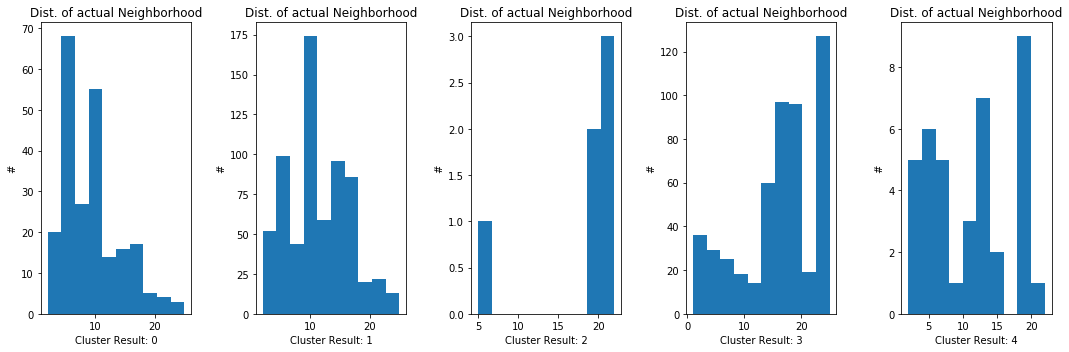

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 10 CLUSTERS - KMEANS


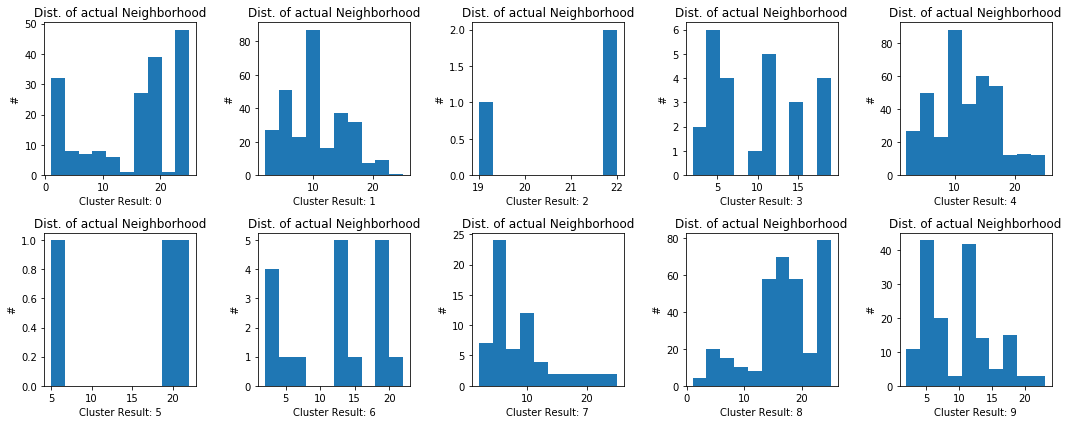

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 15 CLUSTERS - KMEANS


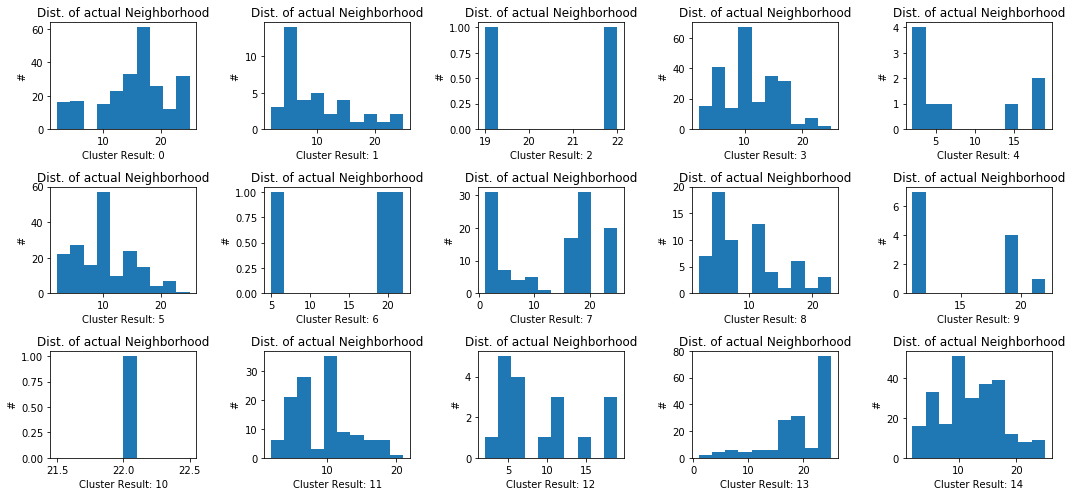

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 20 CLUSTERS - KMEANS


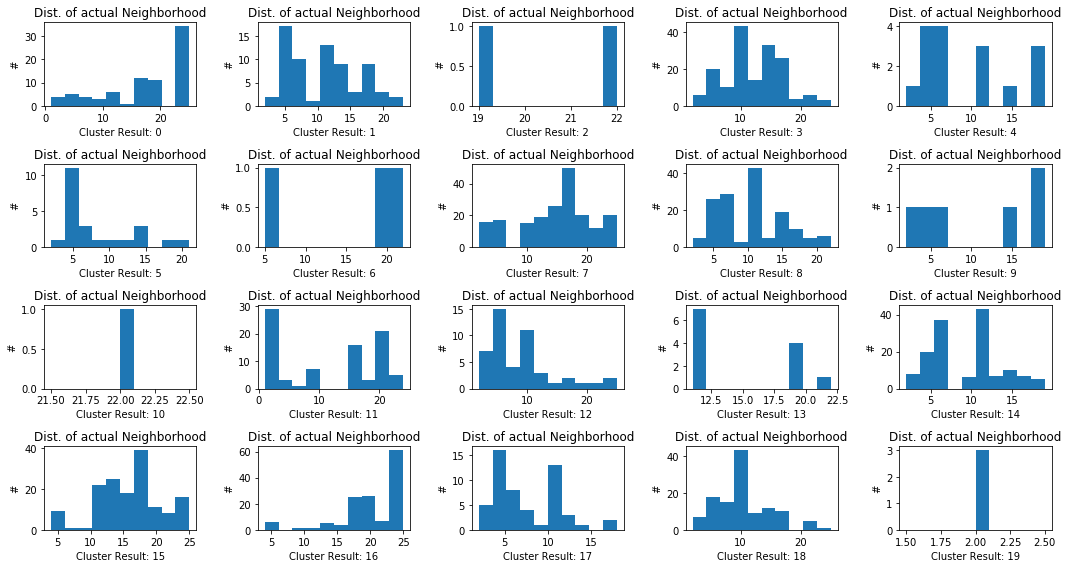

In [0]:
for i in range(4):
  print ('-----------------------------------------------')
  print ('PERFORMANCE OF CLUSTERING WITH %d CLUSTERS - KMEANS'%((i+1)*5))
  clusterResKM = pd.concat([distDf, pd.DataFrame(km[i].labels_)], axis=1)
  clusterResKM.columns = list(clusterResKM.columns[:-1]) + ['labels']
  fig, ax = plt.subplots(nrows = (i+1), ncols = 5, figsize=(15,(i)+5))
  ax = ax.ravel()
  for j, a in enumerate(ax):
    a.hist(clusterResKM[clusterResKM.labels==int(j)].Neighborhood.values)
    a.set_xlabel("Cluster Result: %d"%j)
    a.set_ylabel("#")
    a.set_title("Dist. of actual Neighborhood")
  plt.tight_layout()
  plt.show()
    

**Inference: As the number of clusters increase the actual neighborhood start falling into one particular bin. This is evident from the above graph.**




-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 5 CLUSTERS - AGGLOMERATIVE


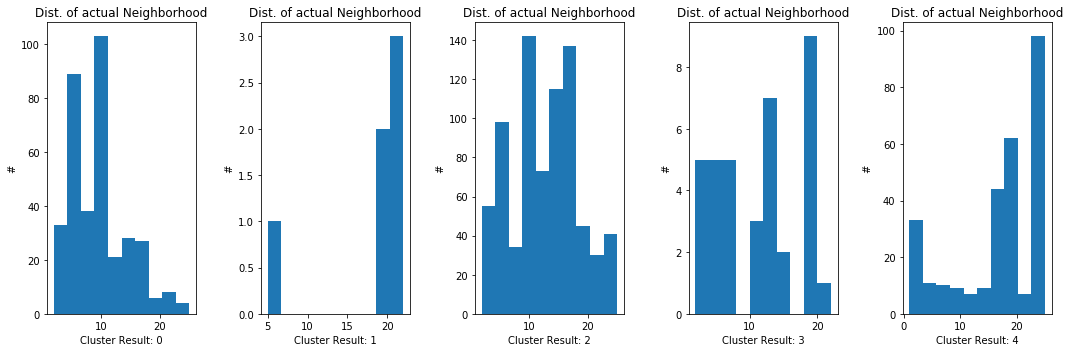

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 10 CLUSTERS - AGGLOMERATIVE


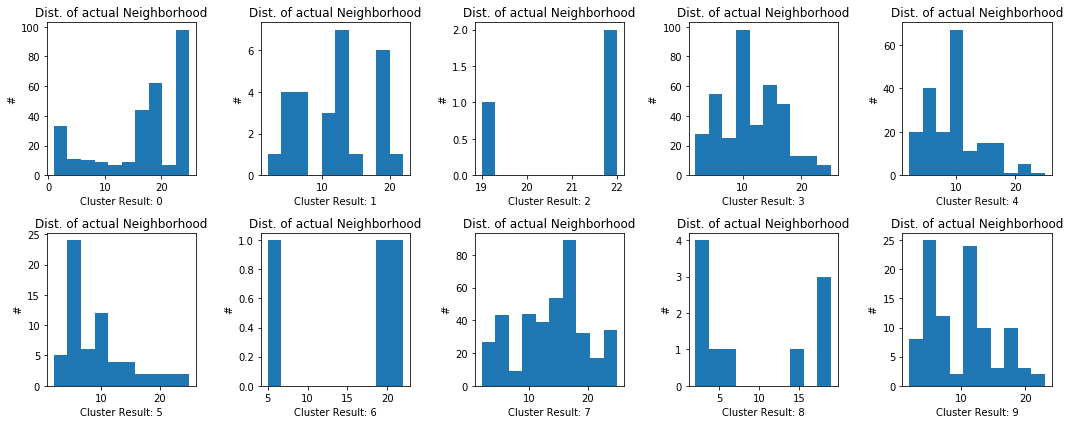

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 15 CLUSTERS - AGGLOMERATIVE


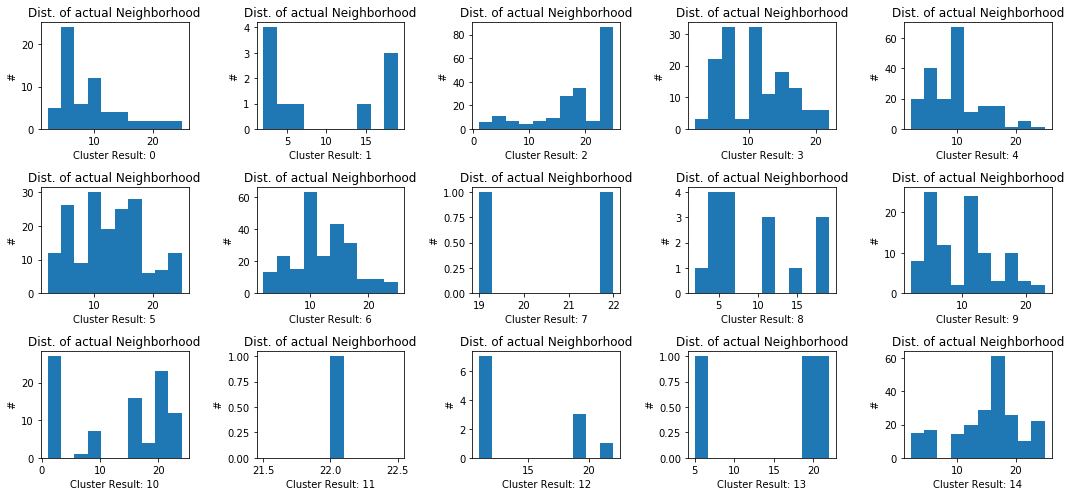

-----------------------------------------------
PERFORMANCE OF CLUSTERING WITH 20 CLUSTERS - AGGLOMERATIVE


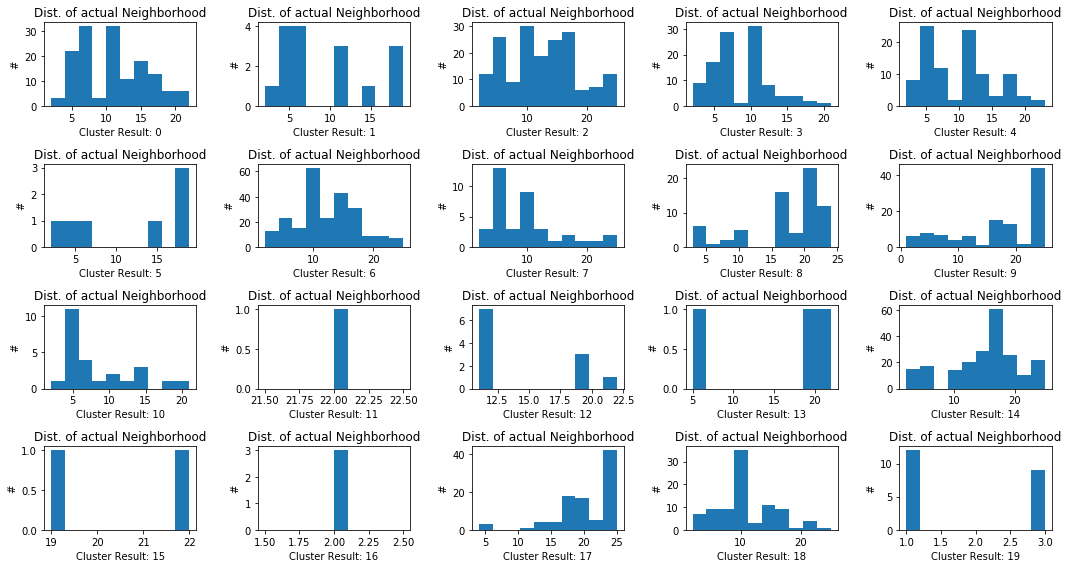

In [92]:
for i in range(4):
  print ('-----------------------------------------------')
  print ('PERFORMANCE OF CLUSTERING WITH %d CLUSTERS - AGGLOMERATIVE'%((i+1)*5))  
  clusterResAG = pd.concat([distDf, pd.DataFrame(agg[i].labels_)], axis=1)
  clusterResAG.columns = list(clusterResAG.columns[:-1]) + ['labels']
  fig, ax = plt.subplots(nrows = (i+1), ncols = 5, figsize=(15,(i)+5))
  ax = ax.ravel()
  for j, a in enumerate(ax):
    a.hist(clusterResAG[clusterResAG.labels==int(j)].Neighborhood.values)
    a.set_xlabel("Cluster Result: %d"%j)
    a.set_ylabel("#")
    a.set_title("Dist. of actual Neighborhood")
  plt.tight_layout()
  plt.show()
    

**Inference: As the number of clusters increase the actual neighborhood start falling into one particular bin. This is evident from the above graph.**

## Part 6 - Linear Regression

In [94]:
data.YearRemodAdd.describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [0]:
data['SalePerSF1'] = data['SalePrice']/data['LotArea']
data['SalePerSF2'] = data['SalePrice']/data['GrLivArea']
sortedIndexSF1 = pd.concat([data.groupby('Neighborhood').SalePerSF1.mean(), data.groupby('Neighborhood').SalePerSF1.std()], axis=1)
sortedIndexSF1.columns = list(['meanVal', 'stdVal'])
sortedIndexSF1 = sortedIndexSF1.sort_values(['stdVal'])
sortedIndexSF1 = sortedIndexSF1.sort_values(['meanVal'], ascending=False)
sortedIndexSF1.reset_index(inplace=True)


sortedIndexSF2 = pd.concat([data.groupby('Neighborhood').SalePerSF2.mean(), data.groupby('Neighborhood').SalePerSF2.std()], axis=1)
sortedIndexSF2.columns = list(['meanVal', 'stdVal'])
sortedIndexSF2 = sortedIndexSF2.sort_values(['stdVal'])
sortedIndexSF2 = sortedIndexSF2.sort_values(['meanVal'], ascending=False)
sortedIndexSF2.reset_index(inplace=True)


In [96]:
sortedIndexSF1

,Neighborhood,meanVal,stdVal
0,Blueste,86.410256,12.691660
1,BrDale,58.323157,8.180963
2,Blmngtn,57.643934,8.584397
3,NPkVill,49.577688,18.424942
4,MeadowV,45.394765,10.091137
5,StoneBr,36.074463,10.735424
6,Somerst,35.461897,17.118195
7,NridgHt,31.426916,10.660200
8,NoRidge,25.668164,7.968889
9,CollgCr,21.393421,5.929116


In [97]:
sortedIndexSF2

,Neighborhood,meanVal,stdVal
0,StoneBr,165.402275,35.922454
1,NridgHt,164.578057,31.545375
2,Veenker,154.980914,32.661473
3,Somerst,141.335966,24.247865
4,Timber,139.766483,28.914709
5,CollgCr,136.783680,19.856032
6,Blmngtn,136.566974,16.442328
7,NoRidge,132.271687,21.780224
8,Mitchel,126.017449,27.885001
9,ClearCr,124.242989,35.154804


In [0]:
for i in data.Neighborhood.unique():
  data.loc[ data.Neighborhood==i,'SalePerSF1'] = float(sortedIndexSF1[sortedIndexSF1.Neighborhood==i]['meanVal'])
  data.loc[data.Neighborhood==i,'SalePerSF2'] = float(sortedIndexSF2[sortedIndexSF2.Neighborhood==i]['meanVal'])

In [0]:
def lregress(X,Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
  lr = LinearRegression(n_jobs=-1)
  lr.fit(X_train, Y_train)
  print ('\n------------------------------------\n LINEAR REGRESSION')
  pprint ((dict(zip(lrCols, lr.coef_))))
  Y_pred = lr.predict(X_test)
  print ("\nr2 score: ", metrics.r2_score(Y_test, Y_pred))
  print ("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
  print ("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
  print ("MAPE: ",np.mean((np.abs(Y_pred-Y_test))*100.0/(Y_test)))

In [0]:
def rregress(X, Y, alpha=1000):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
  rr = Ridge(alpha=alpha)
  rr.fit(X_train, Y_train)
  Y_pred = rr.predict(X_test)
  print ('\n------------------------------------\n RIDGE REGRESSION')
  pprint ((dict(zip(lrCols, rr.coef_))))
  print ("\nr2 score: ", metrics.r2_score(Y_test, Y_pred))
  print ("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
  print ("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
  print ("MAPE: ",np.mean((np.abs(Y_pred-Y_test))*100.0/(Y_test)))

In [101]:
lrCols = ['Neighborhood', 'HouseStyle', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd',
          'GarageArea', 'OverallQual', 'SalePerSF1', 'SalePerSF2','SalePrice']
X, Y = pd.concat([dataObj[lrCols[:2]], data[lrCols[2:-1]]], axis=1), (data['SalePrice'])
lregress(X,Y)
rregress(X,Y)


------------------------------------
 LINEAR REGRESSION
{'BedroomAbvGr': -5313.380734908778,
 'GarageArea': 37.7376601870739,
 'GrLivArea': 60.52860087454732,
 'HouseStyle': -1541.7616681224774,
 'KitchenAbvGr': -21143.02508847562,
 'LotArea': 0.5381583387256796,
 'Neighborhood': 1200.3343434550277,
 'OverallQual': 15989.290578689664,
 'SalePerSF1': -178.54389643024504,
 'SalePerSF2': 687.5213081470903,
 'YearBuilt': 17.812410335845243,
 'YearRemodAdd': 212.94508713497666}

r2 score:  0.8097841678719636
MAE:  23705.077395738943
RMSE:  38197.08735222601
MAPE:  13.750328649952499

------------------------------------
 RIDGE REGRESSION
{'BedroomAbvGr': -2482.9681943659075,
 'GarageArea': 45.13517292557304,
 'GrLivArea': 64.40482622841984,
 'HouseStyle': -1588.8586658973636,
 'KitchenAbvGr': -1515.1025574136586,
 'LotArea': 0.530073990005154,
 'Neighborhood': 1507.4620197507172,
 'OverallQual': 7668.252806709999,
 'SalePerSF1': 26.551565139095427,
 'SalePerSF2': 764.5972810024646,
 'YearB

- **Inference: An r2 score of 0.8 is good. From the set of input columns, OverallQual, Neighborhood, SalePerSf of GrLivArea, YearBuilt, YearRemodAdd, GarageArea and GrLivArea have positive weights**

- **Lot Area has negligible contribution and Bedroom, kitchen, housestyle have negative weights.**

In [102]:
lrCols = ['Neighborhood', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd',
          'GarageArea', 'OverallQual', 'Fireplaces', 'TotalBsmtSF', 'TotRmsAbvGrd']
X, Y = pd.concat([dataObj['Neighborhood'], data[lrCols[1:]]], axis=1), data['SalePrice']
lregress(X, Y)
rregress(X, Y)


------------------------------------
 LINEAR REGRESSION
{'BedroomAbvGr': -7761.248819209868,
 'Fireplaces': 6472.859638138523,
 'GarageArea': 35.62261847581394,
 'GrLivArea': 38.28408281955063,
 'KitchenAbvGr': -24867.249784068343,
 'LotArea': 0.4073677009899157,
 'Neighborhood': 2551.615234855325,
 'OverallQual': 13929.8401852117,
 'TotRmsAbvGrd': 5677.956201196636,
 'TotalBsmtSF': 20.277807825971244,
 'YearBuilt': 33.62475414709994,
 'YearRemodAdd': 245.94460053489655}

r2 score:  0.8189309743380043
MAE:  22449.060290933812
RMSE:  37267.391817043535
MAPE:  12.860764441775821

------------------------------------
 RIDGE REGRESSION
{'BedroomAbvGr': -2330.3563923577813,
 'Fireplaces': 2611.558005970284,
 'GarageArea': 40.89416043498849,
 'GrLivArea': 51.59224162387532,
 'KitchenAbvGr': -1460.945137801179,
 'LotArea': 0.37543035439040257,
 'Neighborhood': 2989.8490900595216,
 'OverallQual': 7125.623641599,
 'TotRmsAbvGrd': 763.7098893371591,
 'TotalBsmtSF': 24.42390765339373,
 'YearBuil

In [103]:
X.shape

(1460, 13)

## Part 7 - External Dataset

[Data](https://fred.stlouisfed.org/series/ATNHPIUS11180Q) from an external source specifies the Pricing Index of houses at Ames, IA over the years.

In [104]:
lrCols = ['Neighborhood', 'HouseStyle', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd',
          'GarageArea', 'OverallQual', 'SalePerSF1', 'SalePerSF2','SalePrice']
X = pd.concat([dataObj[lrCols[:2]], data[lrCols[2:]]], axis=1)
%ls

data_description.txt  sample_submission1.csv  test.csv
HousePriceIndex.csv   sample_submission.csv   train.csv


In [105]:
externalData = pd.read_csv('./HousePriceIndex.csv', parse_dates=['DATE'])
externalData.head()

,DATE,ATNHPIUS11180Q
0,1986-10-01,67.44
1,1987-01-01,67.74
2,1987-04-01,70.17
3,1987-07-01,69.03
4,1987-10-01,68.97


It is merged with YearRemodAdd as the key, since the data is available only since 1986. The YearBuilt starts much before.

In [0]:
externalData.columns = ['Date', 'PriceIndex']
externalData['YearRemodAdd'] = externalData.Date.dt.year

In [0]:
externalData = pd.DataFrame(externalData.groupby('YearRemodAdd').PriceIndex.mean())

In [108]:
externalData.reset_index()

,YearRemodAdd,PriceIndex
0,1986,67.4400
1,1987,68.9775
2,1988,70.5325
3,1989,73.2475
4,1990,77.3800
5,1991,81.8125
6,1992,86.5550
7,1993,91.9500
8,1994,98.1075
9,1995,103.2600


In [109]:
mergedData = pd.merge(X, externalData, on='YearRemodAdd')
mergedData.shape

(832, 15)

In [110]:
mergedData.columns

Index(['Neighborhood', 'HouseStyle', 'YearBuilt', 'LotArea', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd',
       'GarageArea', 'OverallQual', 'SalePerSF1', 'SalePerSF2', 'SalePrice',
       'PriceIndex'],
      dtype='object')

**YearRemodAdd was removed since PriceIndex was added based on that.**

In [111]:
lrCols = ['Neighborhood', 'HouseStyle', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'PriceIndex',
          'GarageArea', 'OverallQual' ]
Y = mergedData[lrCols]
X = mergedData[['SalePrice']]
lregress(X,Y)
rregress(X,Y)


------------------------------------
 LINEAR REGRESSION
{'BedroomAbvGr': array([0.00459915]),
 'GarageArea': array([4.77037988e-05]),
 'GrLivArea': array([0.02787688]),
 'HouseStyle': array([3.63400636e-06]),
 'KitchenAbvGr': array([2.06729435e-06]),
 'LotArea': array([0.00014779]),
 'Neighborhood': array([4.69174352e-05]),
 'OverallQual': array([0.00164167]),
 'PriceIndex': array([-1.66818011e-07]),
 'YearBuilt': array([0.00014779])}

r2 score:  0.20354950767931176
MAE:  300.3727513236534
RMSE:  1617.909373659017
MAPE:  Neighborhood    45.421349
HouseStyle      14.358417
YearBuilt        0.994014
YearBuilt        0.994014
LotArea         36.217199
GrLivArea       17.003330
BedroomAbvGr          inf
KitchenAbvGr     2.356689
PriceIndex      22.215985
GarageArea            inf
OverallQual     10.780741
dtype: float64

------------------------------------
 RIDGE REGRESSION
{'BedroomAbvGr': array([0.00459915]),
 'GarageArea': array([4.77037988e-05]),
 'GrLivArea': array([0.02787688]),
 '

**Inference: The performance takes a sharp dip. The PriceIndex couldn't clearly convey the information to the model that YearRemodAdd could.**

## Part 8 - Permutation Test

In [114]:
def RMSEVal(Y_test ,Y_pred):
  return np.sqrt(np.mean((np.log(Y_test) - np.log(Y_pred))**2))

PtestCols = ['Neighborhood', 'HouseStyle', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 
             'OverallQual', 'SalePerSF1', 'SalePerSF2', 'OverallCond']
X, Y = pd.concat([dataObj[PtestCols[:2]], data[PtestCols[2:]]], axis=1), data['SalePrice']          
for i in PtestCols:
  
  Y = Y[~pd.isna(X[i])]
  x = X[~pd.isna(X[i])] 
  lr = LinearRegression()
  RMSLEScore = metrics.make_scorer(RMSEVal,greater_is_better=False)
  score, permutation_scores, pvalue = permutation_test_score(lr, x, Y, n_permutations = 100, 
                                                             scoring = RMSLEScore, cv =None)
  print (i, pvalue)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



Neighborhood 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



HouseStyle 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



YearBuilt 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GrLivArea 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



BedroomAbvGr 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



KitchenAbvGr 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GarageArea 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



OverallQual 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



SalePerSF1 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



SalePerSF2 0.009900990099009901


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



OverallCond 0.009900990099009901


**Not clearly able to see why the p val for all the columns returns the same value. They are all lesser than 0.05. If this is true, these columns are suited for modeling.**

## Part 9 - Result

In [0]:
def etregress(X, Y, n_est=80):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
  et = ExtraTreesRegressor(n_estimators=n_est, criterion='mae', n_jobs=-1)
  et.fit(X_train, Y_train)
  Y_pred = et.predict(X_test)
  print ('\n------------------------------------\n EXTRA TREES REGRESSION')
  print ("\nr2 score: ", metrics.r2_score(Y_test, Y_pred))
  print ("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
  print ("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
  print ("MAPE: ",np.mean((np.abs(Y_pred-Y_test))*100.0/(Y_test)))  
  return et

In [0]:
lrCols = ['Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual', 'Foundation', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd',
          'GarageArea', 'OverallQual', 'Fireplaces', 'TotalBsmtSF', 'SalePerSF1', 'SalePerSF2', 'TotRmsAbvGrd']
X, Y = pd.concat([dataObj[lrCols[:6]], data[lrCols[6:]]], axis=1), data['SalePrice']
et = etregress(X, Y, 20)


------------------------------------
 EXTRA TREES REGRESSION

r2 score:  0.9009302923165928
MAE:  18086.741952054796
RMSE:  27566.228889393013
MAPE:  11.07789962313038


In [0]:
ls

data_description.txt    sample_submission.csv  train.csv
sample_submission1.csv  test.csv


In [0]:
sampleFile = pd.read_csv('./test.csv', low_memory=False)
sampleFile = sampleFile[['Id']+lrCols]

In [0]:
sampleFile.head()

,Id,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,YearBuilt,YearRemodAdd,GarageArea,OverallQual,Fireplaces,TotalBsmtSF,TotRmsAbvGrd
0,1461,NAmes,1961,11622,896,2,1,1961,1961,730.0,5,0,882.0,5
1,1462,NAmes,1958,14267,1329,3,1,1958,1958,312.0,6,0,1329.0,6
2,1463,Gilbert,1997,13830,1629,3,1,1997,1998,482.0,5,1,928.0,6
3,1464,Gilbert,1998,9978,1604,3,1,1998,1998,470.0,6,1,926.0,7
4,1465,StoneBr,1992,5005,1280,2,1,1992,1992,506.0,8,0,1280.0,5


In [0]:
sampleFile.Neighborhood.replace(dict(zip(sortedIndexN.Neighborhood, reversed(range(1,len(sortedIndexN)+1)))), inplace=True)
sampleFile.head()

,Id,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,YearBuilt,YearRemodAdd,GarageArea,OverallQual,Fireplaces,TotalBsmtSF,TotRmsAbvGrd
0,1461,NAmes,1961,11622,896,2,1,1961,1961,730.0,5,0,882.0,5
1,1462,NAmes,1958,14267,1329,3,1,1958,1958,312.0,6,0,1329.0,6
2,1463,Gilbert,1997,13830,1629,3,1,1997,1998,482.0,5,1,928.0,6
3,1464,Gilbert,1998,9978,1604,3,1,1998,1998,470.0,6,1,926.0,7
4,1465,StoneBr,1992,5005,1280,2,1,1992,1992,506.0,8,0,1280.0,5


In [0]:
sampleFile.Neighborhood =  sampleFile.Neighborhood.replace(dict(zip(sortedIndexN.Neighborhood, reversed(range(1,len(sortedIndexN)+1)))))
sampleFile.head()

,Id,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,YearBuilt,YearRemodAdd,GarageArea,OverallQual,Fireplaces,TotalBsmtSF,TotRmsAbvGrd
0,1461,11,1961,11622,896,2,1,1961,1961,730.0,5,0,882.0,5
1,1462,11,1958,14267,1329,3,1,1958,1958,312.0,6,0,1329.0,6
2,1463,15,1997,13830,1629,3,1,1997,1998,482.0,5,1,928.0,6
3,1464,15,1998,9978,1604,3,1,1998,1998,470.0,6,1,926.0,7
4,1465,23,1992,5005,1280,2,1,1992,1992,506.0,8,0,1280.0,5


In [0]:
for i in sampleFile.columns:
  print (i, np.sum(sampleFile[i].isna()))

Id 0
Neighborhood 0
YearBuilt YearBuilt    0
YearBuilt    0
dtype: int64
LotArea 0
GrLivArea 0
BedroomAbvGr 0
KitchenAbvGr 0
YearBuilt YearBuilt    0
YearBuilt    0
dtype: int64
YearRemodAdd 0
GarageArea 1
OverallQual 0
Fireplaces 0
TotalBsmtSF 1
TotRmsAbvGrd 0


In [0]:
sampleFile.TotalBsmtSF = sampleFile.TotalBsmtSF.fillna(0)
sampleFile.GarageArea = sampleFile.GarageArea.fillna(0)

In [0]:
for i in sampleFile.columns:
  print (i, np.sum(sampleFile[i].isna()))

Id 0
Neighborhood 0
YearBuilt YearBuilt    0
YearBuilt    0
dtype: int64
LotArea 0
GrLivArea 0
BedroomAbvGr 0
KitchenAbvGr 0
YearBuilt YearBuilt    0
YearBuilt    0
dtype: int64
YearRemodAdd 0
GarageArea 0
OverallQual 0
Fireplaces 0
TotalBsmtSF 0
TotRmsAbvGrd 0


In [0]:
sampleFile.head()

,Id,Neighborhood,YearBuilt,LotArea,GrLivArea,BedroomAbvGr,KitchenAbvGr,YearBuilt,YearRemodAdd,GarageArea,OverallQual,Fireplaces,TotalBsmtSF,TotRmsAbvGrd
0,1461,11,1961,11622,896,2,1,1961,1961,730.0,5,0,882.0,5
1,1462,11,1958,14267,1329,3,1,1958,1958,312.0,6,0,1329.0,6
2,1463,15,1997,13830,1629,3,1,1997,1998,482.0,5,1,928.0,6
3,1464,15,1998,9978,1604,3,1,1998,1998,470.0,6,1,926.0,7
4,1465,23,1992,5005,1280,2,1,1992,1992,506.0,8,0,1280.0,5


In [0]:
X.columns

Index(['Neighborhood', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
       'OverallQual', 'Fireplaces', 'TotalBsmtSF', 'TotRmsAbvGrd'],
      dtype='object')

In [0]:
samplePred = et.predict(sampleFile.iloc[:,1:])


In [0]:
samplePred = pd.concat([sampleFile['Id'], pd.DataFrame(samplePred)], axis=1)
samplePred.columns = ['Id', 'SalePrice']
samplePred.head()

,Id,SalePrice
0,1461,130425.0
1,1462,145872.5
2,1463,163950.0
3,1464,175645.0
4,1465,202422.8


In [0]:
samplePred.to_csv("sample_submission1.csv", index=False)

In [0]:
lasso = GradientBoostingRegressor(n_estimators=100)
X_train, X_test, Y_train, Y_test = train_test_split((X), Y, test_size=0.20, random_state=42)
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_test)
print ('\n------------------------------------\n EXTRA TREES REGRESSION')
print ("\nr2 score: ", metrics.r2_score(Y_test, Y_pred))
print ("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))
print ("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print ("MAPE: ",np.mean((np.abs(Y_pred-Y_test))*100.0/(Y_test)))  


------------------------------------
 EXTRA TREES REGRESSION

r2 score:  0.9074723634576396
MAE:  17501.252828856843
RMSE:  26640.517177036036
MAPE:  10.827525294834118


In [0]:
lasso.feature_importances_

array([1.25258539e-01, 1.27732152e-04, 2.07867760e-04, 2.54744138e-02,
       1.79747870e-02, 4.40623719e-04, 2.73498590e-03, 2.02144667e-02,
       1.49873707e-01, 2.03686296e-03, 1.32832296e-03, 7.16978600e-03,
       2.23454265e-02, 4.04111007e-02, 4.70258683e-01, 1.08564736e-02,
       9.09401681e-02, 1.23460522e-02])

In [0]:
X.columns

Index(['Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'Foundation', 'YearBuilt', 'LotArea', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
       'OverallQual', 'Fireplaces', 'TotalBsmtSF', 'TotRmsAbvGrd'],
      dtype='object')

**DETAILS**
- KAGGLE LINK: https://www.kaggle.com/adithya8
- HIGHEST RANK: 3417
- SCORE: 0.166683
- NUMBER OF ENTRIES: 1
- IMAGE: [here](https://drive.google.com/file/d/16Fe-LMI62MbpdDBugG85d88sDog-uWLp/view?usp=sharing)